## Data aggregation of energy market prices in bidding zone NO1 (Norway Østlandet) and neighbouring zones for 2020 - 2022

### Dependencies

In [1]:
import numpy as np
# importing dependencies to aggregate dataset
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from functools import reduce # used to merge the dataset

### Aggregation of day-ahead price data
Pricing data is of spot (day-ahead) market prices in the currency Euro per MWh

Importing price data from each zone

In [2]:
# reading price csv to dataframes

# 2020 day-ahead price data
prices_no1_2020 = pd.read_csv("../datasets/prices/NO1 Day-ahead Prices_202001010000-202101010000.csv")
prices_no2_2020 = pd.read_csv("../datasets/prices/NO2 Day-ahead Prices_202001010000-202101010000.csv")
prices_no3_2020 = pd.read_csv("../datasets/prices/NO3 Day-ahead Prices_202001010000-202101010000.csv")
prices_no5_2020 = pd.read_csv("../datasets/prices/NO5 Day-ahead Prices_202001010000-202101010000.csv")
prices_se3_2020 = pd.read_csv("../datasets/prices/SE3 Day-ahead Prices_202001010000-202101010000.csv")

# 2021 day-ahead price data
prices_no1_2021 = pd.read_csv("../datasets/prices/NO1 Day-ahead Prices_202101010000-202201010000.csv")
prices_no2_2021 = pd.read_csv("../datasets/prices/NO2 Day-ahead Prices_202101010000-202201010000.csv")
prices_no3_2021 = pd.read_csv("../datasets/prices/NO3 Day-ahead Prices_202101010000-202201010000.csv")
prices_no5_2021 = pd.read_csv("../datasets/prices/NO5 Day-ahead Prices_202101010000-202201010000.csv")
prices_se3_2021 = pd.read_csv("../datasets/prices/SE3 Day-ahead Prices_202101010000-202201010000.csv")

# 2022 day-ahead price data
prices_no1_2022 = pd.read_csv("../datasets/prices/NO1 Day-ahead Prices_202201010000-202301010000.csv")
prices_no2_2022 = pd.read_csv("../datasets/prices/NO2 Day-ahead Prices_202201010000-202301010000.csv")
prices_no3_2022 = pd.read_csv("../datasets/prices/NO3 Day-ahead Prices_202201010000-202301010000.csv")
prices_no5_2022 = pd.read_csv("../datasets/prices/NO5 Day-ahead Prices_202201010000-202301010000.csv")
prices_se3_2022 = pd.read_csv("../datasets/prices/SE3 Day-ahead Prices_202201010000-202301010000.csv")

# creating list of price dataframes
prices_dataframes = [
    prices_no1_2020,
    prices_no2_2020,
    prices_no3_2020,
    prices_no5_2020,
    prices_se3_2020,
    prices_no1_2021,
    prices_no2_2021,
    prices_no3_2021,
    prices_no5_2021,
    prices_se3_2021,
    prices_no1_2022,
    prices_no2_2022,
    prices_no3_2022,
    prices_no5_2022,
    prices_se3_2022]

# checking shape of each dataframe to see if all dataframes have the same number of rows. 
for i in prices_dataframes:
    print(i.shape)

(8784, 4)
(8784, 4)
(8784, 4)
(8784, 4)
(8784, 4)
(8760, 4)
(8760, 4)
(8760, 4)
(8760, 4)
(8760, 4)
(8760, 4)
(8760, 4)
(8760, 4)
(8760, 4)
(8760, 4)


We see that all dataframes contain the correct number of rows. row length should be 24 * 365 = 8760 width the exception of 2020 which is a leap year and should have 24 aditional rows 8760 + 24 = 8784.

We can now concatenate coresponding datasets for different years:

In [3]:
# Concatinating the dataset to add the first week of 2023 to the 2022 datasets. ignore index ignores the index number of the row in 2023 and gives it a new after being "appended"
prices_no1 = pd.concat([prices_no1_2020, prices_no1_2021, prices_no1_2022], ignore_index=True)
prices_no2 = pd.concat([prices_no2_2020, prices_no2_2021, prices_no2_2022])
prices_no3 = pd.concat([prices_no3_2020, prices_no3_2021, prices_no3_2022])
prices_no5 = pd.concat([prices_no5_2020, prices_no5_2021, prices_no5_2022])
prices_se3 = pd.concat([prices_se3_2020, prices_se3_2021, prices_se3_2022])

# creating a list of the concatinated dataframes:
concat_prices_dataframes = [prices_no1, prices_no2, prices_no3, prices_no5, prices_se3]

# checking the shape of the resulting dataframes:
for i in concat_prices_dataframes:
    print(i.shape)

(26304, 4)
(26304, 4)
(26304, 4)
(26304, 4)
(26304, 4)


We can see that the dataset has the correct number of rows (8784 + 8760 + 8760 = 26304).

In [4]:
# checking the 5 first rows of the resulting dataframe:
prices_no1.head()

,MTU (UTC),Day-ahead Price [EUR/MWh],Currency,BZN|NO1
0,01.01.2020 00:00 - 01.01.2020 01:00,31.77,EUR,NaN
1,01.01.2020 01:00 - 01.01.2020 02:00,31.57,EUR,NaN
2,01.01.2020 02:00 - 01.01.2020 03:00,31.28,EUR,NaN
3,01.01.2020 03:00 - 01.01.2020 04:00,30.72,EUR,NaN
4,01.01.2020 04:00 - 01.01.2020 05:00,30.27,EUR,NaN


In [5]:
# checking 5 last rows of the resulting dataframe:
prices_no1.tail()

,MTU (UTC),Day-ahead Price [EUR/MWh],Currency,BZN|NO1
26299,31.12.2022 19:00 - 31.12.2022 20:00,123.61,EUR,NaN
26300,31.12.2022 20:00 - 31.12.2022 21:00,121.09,EUR,NaN
26301,31.12.2022 21:00 - 31.12.2022 22:00,120.00,EUR,NaN
26302,31.12.2022 22:00 - 31.12.2022 23:00,119.98,EUR,NaN
26303,31.12.2022 23:00 - 01.01.2023 00:00,119.32,EUR,NaN


we can see that the resulting datafram has the correct time for the first and last row.

There might be some differences between the the dataframes of the different zones so we print out first rows of each dataset to see the structure and content of the dataframes.

In [6]:
prices_no1.head()

,MTU (UTC),Day-ahead Price [EUR/MWh],Currency,BZN|NO1
0,01.01.2020 00:00 - 01.01.2020 01:00,31.77,EUR,NaN
1,01.01.2020 01:00 - 01.01.2020 02:00,31.57,EUR,NaN
2,01.01.2020 02:00 - 01.01.2020 03:00,31.28,EUR,NaN
3,01.01.2020 03:00 - 01.01.2020 04:00,30.72,EUR,NaN
4,01.01.2020 04:00 - 01.01.2020 05:00,30.27,EUR,NaN


In [7]:
prices_no2.head()

,MTU (UTC),Day-ahead Price [EUR/MWh],Currency,BZN|NO2
0,01.01.2020 00:00 - 01.01.2020 01:00,31.77,EUR,NaN
1,01.01.2020 01:00 - 01.01.2020 02:00,31.57,EUR,NaN
2,01.01.2020 02:00 - 01.01.2020 03:00,31.28,EUR,NaN
3,01.01.2020 03:00 - 01.01.2020 04:00,30.72,EUR,NaN
4,01.01.2020 04:00 - 01.01.2020 05:00,30.27,EUR,NaN


In [8]:
prices_no3.head()

,MTU (UTC),Day-ahead Price [EUR/MWh],Currency,BZN|NO3
0,01.01.2020 00:00 - 01.01.2020 01:00,28.45,EUR,NaN
1,01.01.2020 01:00 - 01.01.2020 02:00,27.90,EUR,NaN
2,01.01.2020 02:00 - 01.01.2020 03:00,27.52,EUR,NaN
3,01.01.2020 03:00 - 01.01.2020 04:00,27.54,EUR,NaN
4,01.01.2020 04:00 - 01.01.2020 05:00,26.55,EUR,NaN


In [9]:
prices_no5.head()

,MTU (UTC),Day-ahead Price [EUR/MWh],Currency,BZN|NO5
0,01.01.2020 00:00 - 01.01.2020 01:00,31.77,EUR,NaN
1,01.01.2020 01:00 - 01.01.2020 02:00,31.57,EUR,NaN
2,01.01.2020 02:00 - 01.01.2020 03:00,31.28,EUR,NaN
3,01.01.2020 03:00 - 01.01.2020 04:00,30.72,EUR,NaN
4,01.01.2020 04:00 - 01.01.2020 05:00,30.27,EUR,NaN


In [10]:
prices_se3.head()

,MTU (UTC),Day-ahead Price [EUR/MWh],Currency,BZN|SE3
0,01.01.2020 00:00 - 01.01.2020 01:00,28.45,EUR,NaN
1,01.01.2020 01:00 - 01.01.2020 02:00,27.90,EUR,NaN
2,01.01.2020 02:00 - 01.01.2020 03:00,27.52,EUR,NaN
3,01.01.2020 03:00 - 01.01.2020 04:00,27.54,EUR,NaN
4,01.01.2020 04:00 - 01.01.2020 05:00,26.55,EUR,NaN


#### Preparation for merging of the price data from the different zones:
The common column we will merge the data based on is the date time column "MTU (UTC)". The column currency is redundant since the column that holds price already includes it in the column name. The currency column can therefore be dropped. The datasets have a colum name for which zone the data is from, but does not include any data for each entry. This information can be added to the column name for price and the column for zone can be dropped.

In [11]:
# renaming price columns
prices_no1 = prices_no1.rename(columns={'Day-ahead Price [EUR/MWh]': 'Day-ahead Price [EUR/MWh] BZN|NO1'})
prices_no2 = prices_no2.rename(columns={'Day-ahead Price [EUR/MWh]': 'Day-ahead Price [EUR/MWh] BZN|NO2'})
prices_no3 = prices_no3.rename(columns={'Day-ahead Price [EUR/MWh]': 'Day-ahead Price [EUR/MWh] BZN|NO3'})
prices_no5 = prices_no5.rename(columns={'Day-ahead Price [EUR/MWh]': 'Day-ahead Price [EUR/MWh] BZN|NO5'})
prices_se3 = prices_se3.rename(columns={'Day-ahead Price [EUR/MWh]': 'Day-ahead Price [EUR/MWh] BZN|SE3'})

In [12]:
# dropping redundant columns
prices_no1= prices_no1.drop(['Currency', 'BZN|NO1'], axis=1)
prices_no2= prices_no2.drop(['Currency', 'BZN|NO2'], axis=1)
prices_no3= prices_no3.drop(['Currency', 'BZN|NO3'], axis=1)
prices_no5= prices_no5.drop(['Currency', 'BZN|NO5'], axis=1)
prices_se3= prices_se3.drop(['Currency', 'BZN|SE3'], axis=1)

In [13]:
# merging the price data into one dataframe on the date time column 'MTU (UTC)'
updated_price_dataframes = [prices_no1, prices_no2, prices_no3, prices_no5, prices_se3]
prices = reduce(lambda left, right: pd.merge(left,right, on=['MTU (UTC)']), updated_price_dataframes)

# printing out the 5 first rows resulting dataframe
prices.head()

,MTU (UTC),Day-ahead Price [EUR/MWh] BZN|NO1,Day-ahead Price [EUR/MWh] BZN|NO2,Day-ahead Price [EUR/MWh] BZN|NO3,Day-ahead Price [EUR/MWh] BZN|NO5,Day-ahead Price [EUR/MWh] BZN|SE3
0,01.01.2020 00:00 - 01.01.2020 01:00,31.77,31.77,28.45,31.77,28.45
1,01.01.2020 01:00 - 01.01.2020 02:00,31.57,31.57,27.90,31.57,27.90
2,01.01.2020 02:00 - 01.01.2020 03:00,31.28,31.28,27.52,31.28,27.52
3,01.01.2020 03:00 - 01.01.2020 04:00,30.72,30.72,27.54,30.72,27.54
4,01.01.2020 04:00 - 01.01.2020 05:00,30.27,30.27,26.55,30.27,26.55


In [14]:
# printing out the last 5 rows of the resulting dataframe
prices.tail()

,MTU (UTC),Day-ahead Price [EUR/MWh] BZN|NO1,Day-ahead Price [EUR/MWh] BZN|NO2,Day-ahead Price [EUR/MWh] BZN|NO3,Day-ahead Price [EUR/MWh] BZN|NO5,Day-ahead Price [EUR/MWh] BZN|SE3
26299,31.12.2022 19:00 - 31.12.2022 20:00,123.61,123.61,23.82,123.61,11.57
26300,31.12.2022 20:00 - 31.12.2022 21:00,121.09,121.09,23.93,121.09,14.89
26301,31.12.2022 21:00 - 31.12.2022 22:00,120.00,120.00,23.75,120.00,9.94
26302,31.12.2022 22:00 - 31.12.2022 23:00,119.98,119.98,23.56,119.98,4.84
26303,31.12.2022 23:00 - 01.01.2023 00:00,119.32,119.32,23.35,119.32,2.01


We can se that the datetime of the first and last rows in the dataset are correct. we also want to check if the dataframe still have the correct number of rows to se if the merge was successful

In [15]:
# printing out shape of dataframe
prices.shape

(26304, 6)

The prices dataframe has the correct number of rows (26304) so the aggregation of the price datasets have been successful.

We also want to check if the data has any missing values.

In [16]:
# checking data for missing values, if any
prices.isna().sum()

MTU (UTC)                            0
Day-ahead Price [EUR/MWh] BZN|NO1    0
Day-ahead Price [EUR/MWh] BZN|NO2    0
Day-ahead Price [EUR/MWh] BZN|NO3    0
Day-ahead Price [EUR/MWh] BZN|NO5    0
Day-ahead Price [EUR/MWh] BZN|SE3    0
dtype: int64

The data has no missing values.

### Aggregation of load data
The load data contains data about the power consumption in each zone

Importing load data from each zone

In [17]:
# reading load csv to dataframe

# 2020
load_no1_2020 = pd.read_csv("../datasets/load/NO1 Total Load - Day Ahead _ Actual_202001010000-202101010000.csv")
load_no2_2020 = pd.read_csv("../datasets/load/NO2 Total Load - Day Ahead _ Actual_202001010000-202101010000.csv")
load_no3_2020 = pd.read_csv("../datasets/load/NO3 Total Load - Day Ahead _ Actual_202001010000-202101010000.csv")
load_no5_2020 = pd.read_csv("../datasets/load/NO5 Total Load - Day Ahead _ Actual_202001010000-202101010000.csv")
load_se3_2020 = pd.read_csv("../datasets/load/SE3 Total Load - Day Ahead _ Actual_202001010000-202101010000.csv")

# 2021
load_no1_2021 = pd.read_csv("../datasets/load/NO1_Total Load - Day Ahead _ Actual_202101010000-202201010000.csv")
load_no2_2021 = pd.read_csv("../datasets/load/NO2_Total Load - Day Ahead _ Actual_202101010000-202201010000.csv")
load_no3_2021 = pd.read_csv("../datasets/load/NO3_Total Load - Day Ahead _ Actual_202101010000-202201010000.csv")
load_no5_2021 = pd.read_csv("../datasets/load/NO5_Total Load - Day Ahead _ Actual_202101010000-202201010000.csv")
load_se3_2021 = pd.read_csv("../datasets/load/SE3 Total Load - Day Ahead _ Actual_202101010000-202201010000.csv")

# 2022
load_no1_2022 = pd.read_csv("../datasets/load/NO1 Total Load - Day Ahead _ Actual_202201010000-202301010000.csv")
load_no2_2022 = pd.read_csv("../datasets/load/NO2 Total Load - Day Ahead _ Actual_202201010000-202301010000.csv")
load_no3_2022 = pd.read_csv("../datasets/load/NO3 Total Load - Day Ahead _ Actual_202201010000-202301010000.csv")
load_no5_2022 = pd.read_csv("../datasets/load/NO5 Total Load - Day Ahead _ Actual_202201010000-202301010000.csv")
load_se3_2022 = pd.read_csv("../datasets/load/SE3 Total Load - Day Ahead _ Actual_202201010000-202301010000.csv")

# creating list of load dataframes
load_dataframes = prices_dataframes = [
    load_no1_2020,
    load_no2_2020,
    load_no3_2020,
    load_no5_2020,
    load_se3_2020,
    load_no1_2021,
    load_no2_2021,
    load_no3_2021,
    load_no5_2021,
    load_se3_2021,
    load_no1_2022,
    load_no2_2022,
    load_no3_2022,
    load_no5_2022,
    load_se3_2022]

# checking shape of each dataframe to see if all dataframes have the same number of rows.
for i in load_dataframes:
    print(i.shape)

(8784, 3)
(8784, 3)
(8784, 3)
(8784, 3)
(8784, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)


We see that all dataframes contain the correct number of rows. row length should be 24 * 365 = 8760 width the exception of 2020 which is a leap year and should have 24 aditional rows 8760 + 24 = 8784.

We can now concatenate coresponding datasets for different years:

In [18]:
# Concatinating the dataset to add the first week of 2023 to the 2022 datasets. ignore index ignores the index number of the row in 2023 and gives it a new after being "appended"
load_no1 = pd.concat([load_no1_2020, load_no1_2021, load_no1_2022], ignore_index=True)
load_no2 = pd.concat([load_no2_2020, load_no2_2021, load_no2_2022])
load_no3 = pd.concat([load_no3_2020, load_no3_2021, load_no3_2022])
load_no5 = pd.concat([load_no5_2020, load_no5_2021, load_no5_2022])
load_se3 = pd.concat([load_se3_2020, load_se3_2021, load_se3_2022])

# creating a list of the concatinated dataframes:
concat_load_dataframes = [load_no1, load_no2, load_no3, load_no5, load_se3]

# checking the shape of the resulting dataframes:
for i in concat_load_dataframes:
    print(i.shape)

(26304, 3)
(26304, 3)
(26304, 3)
(26304, 3)
(26304, 3)


We can see that the dataset has the correct number of rows (8784 + 8760 + 8760 = 26304)

In [19]:
# checking the 5 first rows of the resulting dataframe:
load_no1.head()

,Time (UTC),Day-ahead Total Load Forecast [MW] - BZN|NO1,Actual Total Load [MW] - BZN|NO1
0,01.01.2020 00:00 - 01.01.2020 01:00,4316.0,4333.0
1,01.01.2020 01:00 - 01.01.2020 02:00,4270.0,4250.0
2,01.01.2020 02:00 - 01.01.2020 03:00,4209.0,4167.0
3,01.01.2020 03:00 - 01.01.2020 04:00,4214.0,4145.0
4,01.01.2020 04:00 - 01.01.2020 05:00,4250.0,4222.0


In [20]:
# checking the 5 last rows of the resulting dataframe:
load_no1.tail()

,Time (UTC),Day-ahead Total Load Forecast [MW] - BZN|NO1,Actual Total Load [MW] - BZN|NO1
26299,31.12.2022 19:00 - 31.12.2022 20:00,4677.0,4650.0
26300,31.12.2022 20:00 - 31.12.2022 21:00,4582.0,4573.0
26301,31.12.2022 21:00 - 31.12.2022 22:00,4554.0,4453.0
26302,31.12.2022 22:00 - 31.12.2022 23:00,4434.0,4389.0
26303,31.12.2022 23:00 - 01.01.2023 00:00,4384.0,4444.0


we can see that the resulting datafram has the correct time for the first and last row.

There might be some differences between the the dataframes of the different zones so we print out first rows of each dataset to see the structure and content of the dataframes.

In [21]:
load_no1.head()

,Time (UTC),Day-ahead Total Load Forecast [MW] - BZN|NO1,Actual Total Load [MW] - BZN|NO1
0,01.01.2020 00:00 - 01.01.2020 01:00,4316.0,4333.0
1,01.01.2020 01:00 - 01.01.2020 02:00,4270.0,4250.0
2,01.01.2020 02:00 - 01.01.2020 03:00,4209.0,4167.0
3,01.01.2020 03:00 - 01.01.2020 04:00,4214.0,4145.0
4,01.01.2020 04:00 - 01.01.2020 05:00,4250.0,4222.0


In [22]:
load_no2.head()

,Time (UTC),Day-ahead Total Load Forecast [MW] - BZN|NO2,Actual Total Load [MW] - BZN|NO2
0,01.01.2020 00:00 - 01.01.2020 01:00,3770.0,4139.0
1,01.01.2020 01:00 - 01.01.2020 02:00,3717.0,4114.0
2,01.01.2020 02:00 - 01.01.2020 03:00,3680.0,4030.0
3,01.01.2020 03:00 - 01.01.2020 04:00,3668.0,4032.0
4,01.01.2020 04:00 - 01.01.2020 05:00,3754.0,4032.0


In [23]:
load_no3.head()

,Time (UTC),Day-ahead Total Load Forecast [MW] - BZN|NO3,Actual Total Load [MW] - BZN|NO3
0,01.01.2020 00:00 - 01.01.2020 01:00,3283.0,3016.0
1,01.01.2020 01:00 - 01.01.2020 02:00,3234.0,2945.0
2,01.01.2020 02:00 - 01.01.2020 03:00,3189.0,3032.0
3,01.01.2020 03:00 - 01.01.2020 04:00,3198.0,2988.0
4,01.01.2020 04:00 - 01.01.2020 05:00,3215.0,2848.0


In [24]:
load_no5.head()

,Time (UTC),Day-ahead Total Load Forecast [MW] - BZN|NO5,Actual Total Load [MW] - BZN|NO5
0,01.01.2020 00:00 - 01.01.2020 01:00,1843.0,1950.0
1,01.01.2020 01:00 - 01.01.2020 02:00,1806.0,1926.0
2,01.01.2020 02:00 - 01.01.2020 03:00,1773.0,1913.0
3,01.01.2020 03:00 - 01.01.2020 04:00,1770.0,1894.0
4,01.01.2020 04:00 - 01.01.2020 05:00,1752.0,1901.0


In [25]:
load_se3.head()

,Time (UTC),Day-ahead Total Load Forecast [MW] - BZN|SE3,Actual Total Load [MW] - BZN|SE3
0,01.01.2020 00:00 - 01.01.2020 01:00,9214,9350
1,01.01.2020 01:00 - 01.01.2020 02:00,9079,9158
2,01.01.2020 02:00 - 01.01.2020 03:00,8966,8980
3,01.01.2020 03:00 - 01.01.2020 04:00,8919,8914
4,01.01.2020 04:00 - 01.01.2020 05:00,8980,8964


#### preparation for merging of the load data from the different zones:
The common values we will merge the data based on is the date time column "Time (UTC)", however this column is named "MTU (UTC)" in the prices' dataset. The time column will be renamed to "MTU (UTC)" so that the datasets can be merged. The column "Day-ahead Total Load Forecast" is redundant since we have the actual total load, so the forecast column will be dropped.

In [26]:
# dropping redundant columns
load_no1 = load_no1.drop(['Day-ahead Total Load Forecast [MW] - BZN|NO1'], axis=1)
load_no2 = load_no2.drop(['Day-ahead Total Load Forecast [MW] - BZN|NO2'], axis=1)
load_no3 = load_no3.drop(['Day-ahead Total Load Forecast [MW] - BZN|NO3'], axis=1)
load_no5 = load_no5.drop(['Day-ahead Total Load Forecast [MW] - BZN|NO5'], axis=1)
load_se3 = load_se3.drop(['Day-ahead Total Load Forecast [MW] - BZN|SE3'], axis=1)

In [27]:
# renaming time columns
load_no1 = load_no1.rename(columns={'Time (UTC)': 'MTU (UTC)'})
load_no2 = load_no2.rename(columns={'Time (UTC)': 'MTU (UTC)'})
load_no3 = load_no3.rename(columns={'Time (UTC)': 'MTU (UTC)'})
load_no5 = load_no5.rename(columns={'Time (UTC)': 'MTU (UTC)'})
load_se3 = load_se3.rename(columns={'Time (UTC)': 'MTU (UTC)'})

In [28]:
# merging the load data into one dataframe on the date time column 'MTU (UTC)'
updated_load_dataframes = [load_no1, load_no2, load_no3, load_no5, load_se3]
load = reduce(lambda left, right: pd.merge(left,right, on=['MTU (UTC)']), updated_load_dataframes)

# printing out the resulting dataframe
load.head()

,MTU (UTC),Actual Total Load [MW] - BZN|NO1,Actual Total Load [MW] - BZN|NO2,Actual Total Load [MW] - BZN|NO3,Actual Total Load [MW] - BZN|NO5,Actual Total Load [MW] - BZN|SE3
0,01.01.2020 00:00 - 01.01.2020 01:00,4333.0,4139.0,3016.0,1950.0,9350
1,01.01.2020 01:00 - 01.01.2020 02:00,4250.0,4114.0,2945.0,1926.0,9158
2,01.01.2020 02:00 - 01.01.2020 03:00,4167.0,4030.0,3032.0,1913.0,8980
3,01.01.2020 03:00 - 01.01.2020 04:00,4145.0,4032.0,2988.0,1894.0,8914
4,01.01.2020 04:00 - 01.01.2020 05:00,4222.0,4032.0,2848.0,1901.0,8964


In [29]:
# printing out the last 5 rows of the resulting dataframe
load.tail()

,MTU (UTC),Actual Total Load [MW] - BZN|NO1,Actual Total Load [MW] - BZN|NO2,Actual Total Load [MW] - BZN|NO3,Actual Total Load [MW] - BZN|NO5,Actual Total Load [MW] - BZN|SE3
26299,31.12.2022 19:00 - 31.12.2022 20:00,4650.0,4333.0,3612.0,2128.0,9602
26300,31.12.2022 20:00 - 31.12.2022 21:00,4573.0,4270.0,3605.0,2089.0,9251
26301,31.12.2022 21:00 - 31.12.2022 22:00,4453.0,4294.0,3479.0,2037.0,9092
26302,31.12.2022 22:00 - 31.12.2022 23:00,4389.0,4282.0,3415.0,1991.0,8944
26303,31.12.2022 23:00 - 01.01.2023 00:00,4444.0,4182.0,3346.0,2009.0,8955


We can se that the datetime of the first and last rows in the dataset are correct. we also want to check if the dataframe still have the correct number of rows to se if the merge was successful.

In [30]:
# printing out shape of dataframe
load.shape

(26304, 6)

The load dataframe has the correct number of rows (26304) so the aggregation of the price datasets have been successful.

We also want to check if the dataset has any missing any values:

In [31]:
# checking data for missing values, if any
load.isna().sum()

MTU (UTC)                           0
Actual Total Load [MW] - BZN|NO1    1
Actual Total Load [MW] - BZN|NO2    1
Actual Total Load [MW] - BZN|NO3    1
Actual Total Load [MW] - BZN|NO5    1
Actual Total Load [MW] - BZN|SE3    0
dtype: int64

In [32]:
# checking wich row is missing values
load[load['Actual Total Load [MW] - BZN|NO1'].isnull()]

,MTU (UTC),Actual Total Load [MW] - BZN|NO1,Actual Total Load [MW] - BZN|NO2,Actual Total Load [MW] - BZN|NO3,Actual Total Load [MW] - BZN|NO5,Actual Total Load [MW] - BZN|SE3
16057,31.10.2021 01:00 - 31.10.2021 02:00,NaN,NaN,NaN,NaN,7786


It seems like none of the Norwegian bidding zones have recorded data for the time inteval 31.10.2021 01:00 - 31.10.2021 02:00.

Handling of datasets can be preformed thorugh many means, but since this is time series data we don't want to drop any rows, we are therefore left with imputation of the missing values (i.e generating values in place of the missing values wich aims to reduce the noise in the dataset). Which method of imputation should be used will depend on the dataset. We will postpone this process untill the Exploratory Data Analysis, where we can investigate the dataset and compare the different methods, and choose the best method

### Aggregation of energy generation data

In [33]:
actual_generation_no1 = pd.read_csv("../datasets/wind_solar_fossil_biomass_and_others/UTC/Actual Generation per Production Type_202201010000-202301010000NO1.csv")
actual_generation_no2 = pd.read_csv("../datasets/wind_solar_fossil_biomass_and_others/UTC/Actual Generation per Production Type_202201010000-202301010000 NO2.csv")
actual_generation_no3 = pd.read_csv("../datasets/wind_solar_fossil_biomass_and_others/UTC/Actual Generation per Production Type_202201010000-202301010000NO3.csv")
actual_generation_no5 = pd.read_csv("../datasets/wind_solar_fossil_biomass_and_others/UTC/Actual Generation per Production Type_202201010000-202301010000NO5.csv")
actual_generation_se3 = pd.read_csv("../datasets/wind_solar_fossil_biomass_and_others/UTC/Actual Generation per Production Type_202201010000-202301010000SE3.csv")
actual_generation_no1_2020 = pd.read_csv("../datasets/wind_solar_fossil_biomass_and_others/UTC/2020/NO1Actual Generation per Production Type_202001010000-202101010000.csv")
actual_generation_no2_2020 = pd.read_csv("../datasets/wind_solar_fossil_biomass_and_others/UTC/2020/NO2Actual Generation per Production Type_202001010000-202101010000.csv")
actual_generation_no3_2020 = pd.read_csv("../datasets/wind_solar_fossil_biomass_and_others/UTC/2020/NO3Actual Generation per Production Type_202001010000-202101010000.csv")
actual_generation_no5_2020 = pd.read_csv("../datasets/wind_solar_fossil_biomass_and_others/UTC/2020/NO5Actual Generation per Production Type_202001010000-202101010000.csv")
actual_generation_se3_2020 = pd.read_csv("../datasets/wind_solar_fossil_biomass_and_others/UTC/2020/SE3Actual Generation per Production Type_202001010000-202101010000.csv")
actual_generation_no1_2021 = pd.read_csv("../datasets/wind_solar_fossil_biomass_and_others/UTC/2021/NO1Actual Generation per Production Type_202101010000-202201010000.csv")
actual_generation_no2_2021 = pd.read_csv("../datasets/wind_solar_fossil_biomass_and_others/UTC/2021/NO2Actual Generation per Production Type_202101010000-202201010000.csv")
actual_generation_no3_2021 = pd.read_csv("../datasets/wind_solar_fossil_biomass_and_others/UTC/2021/NO3Actual Generation per Production Type_202101010000-202201010000.csv")
actual_generation_no5_2021 = pd.read_csv("../datasets/wind_solar_fossil_biomass_and_others/UTC/2021/NO5Actual Generation per Production Type_202101010000-202201010000.csv")
actual_generation_se3_2021 = pd.read_csv("../datasets/wind_solar_fossil_biomass_and_others/UTC/2021/SE3Actual Generation per Production Type_202101010000-202201010000.csv")

In [34]:
actual_generation_no1.head()

,Area,MTU,Biomass - Actual Aggregated [MW],Fossil Brown coal/Lignite - Actual Aggregated [MW],Fossil Coal-derived gas - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Fossil Oil shale - Actual Aggregated [MW],Fossil Peat - Actual Aggregated [MW],...,Hydro Run-of-river and poundage - Actual Aggregated [MW],Hydro Water Reservoir - Actual Aggregated [MW],Marine - Actual Aggregated [MW],Nuclear - Actual Aggregated [MW],Other - Actual Aggregated [MW],Other renewable - Actual Aggregated [MW],Solar - Actual Aggregated [MW],Waste - Actual Aggregated [MW],Wind Offshore - Actual Aggregated [MW],Wind Onshore - Actual Aggregated [MW]
0,BZN|NO1,01.01.2022 00:00 - 01.01.2022 01:00 (UTC),0,n/e,n/e,0,n/e,n/e,n/e,n/e,...,878,321,n/e,n/e,n/e,n/e,n/e,8,n/e,172
1,BZN|NO1,01.01.2022 01:00 - 01.01.2022 02:00 (UTC),0,n/e,n/e,0,n/e,n/e,n/e,n/e,...,897,330,n/e,n/e,n/e,n/e,n/e,8,n/e,151
2,BZN|NO1,01.01.2022 02:00 - 01.01.2022 03:00 (UTC),0,n/e,n/e,0,n/e,n/e,n/e,n/e,...,885,275,n/e,n/e,n/e,n/e,n/e,8,n/e,160
3,BZN|NO1,01.01.2022 03:00 - 01.01.2022 04:00 (UTC),0,n/e,n/e,0,n/e,n/e,n/e,n/e,...,890,269,n/e,n/e,n/e,n/e,n/e,8,n/e,148
4,BZN|NO1,01.01.2022 04:00 - 01.01.2022 05:00 (UTC),0,n/e,n/e,0,n/e,n/e,n/e,n/e,...,892,300,n/e,n/e,n/e,n/e,n/e,8,n/e,147


In [35]:
actual_generation_no2.head()

,Area,MTU,Biomass - Actual Aggregated [MW],Fossil Brown coal/Lignite - Actual Aggregated [MW],Fossil Coal-derived gas - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Fossil Oil shale - Actual Aggregated [MW],Fossil Peat - Actual Aggregated [MW],...,Hydro Run-of-river and poundage - Actual Aggregated [MW],Hydro Water Reservoir - Actual Aggregated [MW],Marine - Actual Aggregated [MW],Nuclear - Actual Aggregated [MW],Other - Actual Aggregated [MW],Other renewable - Actual Aggregated [MW],Solar - Actual Aggregated [MW],Waste - Actual Aggregated [MW],Wind Offshore - Actual Aggregated [MW],Wind Onshore - Actual Aggregated [MW]
0,BZN|NO2,01.01.2022 00:00 - 01.01.2022 01:00 (UTC),n/e,n/e,n/e,0,n/e,n/e,n/e,n/e,...,629,1874,n/e,n/e,n/e,n/e,n/e,5,n/e,244
1,BZN|NO2,01.01.2022 01:00 - 01.01.2022 02:00 (UTC),n/e,n/e,n/e,0,n/e,n/e,n/e,n/e,...,627,2012,n/e,n/e,n/e,n/e,n/e,4,n/e,115
2,BZN|NO2,01.01.2022 02:00 - 01.01.2022 03:00 (UTC),n/e,n/e,n/e,0,n/e,n/e,n/e,n/e,...,624,1643,n/e,n/e,n/e,n/e,n/e,4,n/e,55
3,BZN|NO2,01.01.2022 03:00 - 01.01.2022 04:00 (UTC),n/e,n/e,n/e,0,n/e,n/e,n/e,n/e,...,624,1631,n/e,n/e,n/e,n/e,n/e,4,n/e,61
4,BZN|NO2,01.01.2022 04:00 - 01.01.2022 05:00 (UTC),n/e,n/e,n/e,0,n/e,n/e,n/e,n/e,...,605,1642,n/e,n/e,n/e,n/e,n/e,4,n/e,88


In [36]:
actual_generation_no3.head()

,Area,MTU,Biomass - Actual Aggregated [MW],Fossil Brown coal/Lignite - Actual Aggregated [MW],Fossil Coal-derived gas - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Fossil Oil shale - Actual Aggregated [MW],Fossil Peat - Actual Aggregated [MW],...,Hydro Run-of-river and poundage - Actual Aggregated [MW],Hydro Water Reservoir - Actual Aggregated [MW],Marine - Actual Aggregated [MW],Nuclear - Actual Aggregated [MW],Other - Actual Aggregated [MW],Other renewable - Actual Aggregated [MW],Solar - Actual Aggregated [MW],Waste - Actual Aggregated [MW],Wind Offshore - Actual Aggregated [MW],Wind Onshore - Actual Aggregated [MW]
0,BZN|NO3,01.01.2022 00:00 - 01.01.2022 01:00 (UTC),n/e,n/e,n/e,0,n/e,n/e,n/e,n/e,...,389,2166,n/e,n/e,0,12,n/e,3,n/e,219
1,BZN|NO3,01.01.2022 01:00 - 01.01.2022 02:00 (UTC),n/e,n/e,n/e,0,n/e,n/e,n/e,n/e,...,390,2187,n/e,n/e,0,12,n/e,2,n/e,170
2,BZN|NO3,01.01.2022 02:00 - 01.01.2022 03:00 (UTC),n/e,n/e,n/e,0,n/e,n/e,n/e,n/e,...,405,2183,n/e,n/e,0,12,n/e,1,n/e,126
3,BZN|NO3,01.01.2022 03:00 - 01.01.2022 04:00 (UTC),n/e,n/e,n/e,0,n/e,n/e,n/e,n/e,...,393,2076,n/e,n/e,0,12,n/e,0,n/e,81
4,BZN|NO3,01.01.2022 04:00 - 01.01.2022 05:00 (UTC),n/e,n/e,n/e,0,n/e,n/e,n/e,n/e,...,398,2098,n/e,n/e,0,11,n/e,0,n/e,45


In [37]:
actual_generation_no5.head()

,Area,MTU,Biomass - Actual Aggregated [MW],Fossil Brown coal/Lignite - Actual Aggregated [MW],Fossil Coal-derived gas - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Fossil Oil shale - Actual Aggregated [MW],Fossil Peat - Actual Aggregated [MW],...,Hydro Run-of-river and poundage - Actual Aggregated [MW],Hydro Water Reservoir - Actual Aggregated [MW],Marine - Actual Aggregated [MW],Nuclear - Actual Aggregated [MW],Other - Actual Aggregated [MW],Other renewable - Actual Aggregated [MW],Solar - Actual Aggregated [MW],Waste - Actual Aggregated [MW],Wind Offshore - Actual Aggregated [MW],Wind Onshore - Actual Aggregated [MW]
0,BZN|NO5,01.01.2022 00:00 - 01.01.2022 01:00 (UTC),n/e,n/e,n/e,82,n/e,n/e,n/e,n/e,...,227,1759,n/e,n/e,n/e,n/e,n/e,19,n/e,n/e
1,BZN|NO5,01.01.2022 01:00 - 01.01.2022 02:00 (UTC),n/e,n/e,n/e,82,n/e,n/e,n/e,n/e,...,216,1890,n/e,n/e,n/e,n/e,n/e,20,n/e,n/e
2,BZN|NO5,01.01.2022 02:00 - 01.01.2022 03:00 (UTC),n/e,n/e,n/e,82,n/e,n/e,n/e,n/e,...,215,1460,n/e,n/e,n/e,n/e,n/e,20,n/e,n/e
3,BZN|NO5,01.01.2022 03:00 - 01.01.2022 04:00 (UTC),n/e,n/e,n/e,82,n/e,n/e,n/e,n/e,...,209,1394,n/e,n/e,n/e,n/e,n/e,20,n/e,n/e
4,BZN|NO5,01.01.2022 04:00 - 01.01.2022 05:00 (UTC),n/e,n/e,n/e,82,n/e,n/e,n/e,n/e,...,210,1488,n/e,n/e,n/e,n/e,n/e,19,n/e,n/e


In [38]:
actual_generation_se3.head()

,Area,MTU,Biomass - Actual Aggregated [MW],Fossil Brown coal/Lignite - Actual Aggregated [MW],Fossil Coal-derived gas - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Fossil Oil shale - Actual Aggregated [MW],Fossil Peat - Actual Aggregated [MW],...,Hydro Run-of-river and poundage - Actual Aggregated [MW],Hydro Water Reservoir - Actual Aggregated [MW],Marine - Actual Aggregated [MW],Nuclear - Actual Aggregated [MW],Other - Actual Aggregated [MW],Other renewable - Actual Aggregated [MW],Solar - Actual Aggregated [MW],Waste - Actual Aggregated [MW],Wind Offshore - Actual Aggregated [MW],Wind Onshore - Actual Aggregated [MW]
0,BZN|SE3,01.01.2022 00:00 - 01.01.2022 01:00 (UTC),n/e,n/e,n/e,0.0,n/e,n/e,n/e,n/e,...,n/e,818.0,0,5842.0,851.0,n/e,0.0,n/e,n/e,999.0
1,BZN|SE3,01.01.2022 01:00 - 01.01.2022 02:00 (UTC),n/e,n/e,n/e,0.0,n/e,n/e,n/e,n/e,...,n/e,818.0,0,5839.0,858.0,n/e,0.0,n/e,n/e,958.0
2,BZN|SE3,01.01.2022 02:00 - 01.01.2022 03:00 (UTC),n/e,n/e,n/e,0.0,n/e,n/e,n/e,n/e,...,n/e,838.0,0,5839.0,859.0,n/e,0.0,n/e,n/e,888.0
3,BZN|SE3,01.01.2022 03:00 - 01.01.2022 04:00 (UTC),n/e,n/e,n/e,0.0,n/e,n/e,n/e,n/e,...,n/e,842.0,0,5840.0,856.0,n/e,0.0,n/e,n/e,788.0
4,BZN|SE3,01.01.2022 04:00 - 01.01.2022 05:00 (UTC),n/e,n/e,n/e,0.0,n/e,n/e,n/e,n/e,...,n/e,841.0,0,5839.0,880.0,n/e,0.0,n/e,n/e,734.0


In [39]:
# Renaming every column to have zones instead of using a column for 'Area'
actual_generation_no1.columns = ['Area',
                                 'MTU (UTC)',
                                 'Biomass - BZN|NO1',
                                 'Fossil Brown coal/Lignite - BZN|NO1',
                                 'Fossil Coal-derived gas - BZN|NO1',
                                 'Fossil Gas - BZN|NO1',
                                 'Fossil Hard coal - BZN|NO1',
                                 'Fossil Oil - BZN|NO1',
                                 'Fossil Oil shale - BZN|NO1',
                                 'Fossil Peat - BZN|NO1',
                                 'Geothermal - BZN|NO1',
                                 'Hydro Pumped Storage Aggregated- BZN|NO1',
                                 'Hydro Pumped Storage Consumption - BZN|NO1',
                                 'Hydro Run-of-river and poundage - BZN|NO1',
                                 'Hydro Water Reservoir - BZN|NO1',
                                 'Marine - BZN|NO1',
                                 'Nuclear - BZN|NO1',
                                 'Other - BZN|NO1',
                                 'Other renewable - BZN|NO1',
                                 'Solar - BZN|NO1',
                                 'Waste - BZN|NO1',
                                 'Wind Offshore - BZN|NO1',
                                 'Wind Onshore - BZN|NO1'
                                 ]
actual_generation_no1_2020.columns = ['Area',
                              'MTU (UTC)',
                              'Biomass - BZN|NO1',
                              'Fossil Brown coal/Lignite - BZN|NO1',
                              'Fossil Coal-derived gas - BZN|NO1',
                              'Fossil Gas - BZN|NO1',
                              'Fossil Hard coal - BZN|NO1',
                              'Fossil Oil - BZN|NO1',
                              'Fossil Oil shale - BZN|NO1',
                              'Fossil Peat - BZN|NO1',
                              'Geothermal - BZN|NO1',
                              'Hydro Pumped Storage Aggregated- BZN|NO1',
                              'Hydro Pumped Storage Consumption - BZN|NO1',
                              'Hydro Run-of-river and poundage - BZN|NO1',
                              'Hydro Water Reservoir - BZN|NO1',
                              'Marine - BZN|NO1',
                              'Nuclear - BZN|NO1',
                              'Other - BZN|NO1',
                              'Other renewable - BZN|NO1',
                              'Solar - BZN|NO1',
                              'Waste - BZN|NO1',
                              'Wind Offshore - BZN|NO1',
                              'Wind Onshore - BZN|NO1'
                              ]
actual_generation_no1_2021.columns = ['Area',
                              'MTU (UTC)',
                              'Biomass - BZN|NO1',
                              'Fossil Brown coal/Lignite - BZN|NO1',
                              'Fossil Coal-derived gas - BZN|NO1',
                              'Fossil Gas - BZN|NO1',
                              'Fossil Hard coal - BZN|NO1',
                              'Fossil Oil - BZN|NO1',
                              'Fossil Oil shale - BZN|NO1',
                              'Fossil Peat - BZN|NO1',
                              'Geothermal - BZN|NO1',
                              'Hydro Pumped Storage Aggregated- BZN|NO1',
                              'Hydro Pumped Storage Consumption - BZN|NO1',
                              'Hydro Run-of-river and poundage - BZN|NO1',
                              'Hydro Water Reservoir - BZN|NO1',
                              'Marine - BZN|NO1',
                              'Nuclear - BZN|NO1',
                              'Other - BZN|NO1',
                              'Other renewable - BZN|NO1',
                              'Solar - BZN|NO1',
                              'Waste - BZN|NO1',
                              'Wind Offshore - BZN|NO1',
                              'Wind Onshore - BZN|NO1'
                              ]
actual_generation_no2.columns = ['Area',
                                 'MTU (UTC)',
                                 'Biomass - BZN|NO2',
                                 'Fossil Brown coal/Lignite - BZN|NO2',
                                 'Fossil Coal-derived gas - BZN|NO2',
                                 'Fossil Gas - BZN|NO2',
                                 'Fossil Hard coal - BZN|NO2',
                                 'Fossil Oil - BZN|NO2',
                                 'Fossil Oil shale - BZN|NO2',
                                 'Fossil Peat - BZN|NO2',
                                 'Geothermal - BZN|NO2',
                                 'Hydro Pumped Storage Aggregated- BZN|NO2',
                                 'Hydro Pumped Storage Consumption - BZN|NO2',
                                 'Hydro Run-of-river and poundage - BZN|NO2',
                                 'Hydro Water Reservoir - BZN|NO2',
                                 'Marine - BZN|NO2',
                                 'Nuclear - BZN|NO2',
                                 'Other - BZN|NO2',
                                 'Other renewable - BZN|NO2',
                                 'Solar - BZN|NO2',
                                 'Waste - BZN|NO2',
                                 'Wind Offshore - BZN|NO2',
                                 'Wind Onshore - BZN|NO2'
                                 ]
actual_generation_no2_2020.columns = ['Area',
                              'MTU (UTC)',
                              'Biomass - BZN|NO2',
                              'Fossil Brown coal/Lignite - BZN|NO2',
                              'Fossil Coal-derived gas - BZN|NO2',
                              'Fossil Gas - BZN|NO2',
                              'Fossil Hard coal - BZN|NO2',
                              'Fossil Oil - BZN|NO2',
                              'Fossil Oil shale - BZN|NO2',
                              'Fossil Peat - BZN|NO2',
                              'Geothermal - BZN|NO2',
                              'Hydro Pumped Storage Aggregated- BZN|NO2',
                              'Hydro Pumped Storage Consumption - BZN|NO2',
                              'Hydro Run-of-river and poundage - BZN|NO2',
                              'Hydro Water Reservoir - BZN|NO2',
                              'Marine - BZN|NO2',
                              'Nuclear - BZN|NO2',
                              'Other - BZN|NO2',
                              'Other renewable - BZN|NO2',
                              'Solar - BZN|NO2',
                              'Waste - BZN|NO2',
                              'Wind Offshore - BZN|NO2',
                              'Wind Onshore - BZN|NO2'
                              ]
actual_generation_no2_2021.columns = ['Area',
                              'MTU (UTC)',
                              'Biomass - BZN|NO2',
                              'Fossil Brown coal/Lignite - BZN|NO2',
                              'Fossil Coal-derived gas - BZN|NO2',
                              'Fossil Gas - BZN|NO2',
                              'Fossil Hard coal - BZN|NO2',
                              'Fossil Oil - BZN|NO2',
                              'Fossil Oil shale - BZN|NO2',
                              'Fossil Peat - BZN|NO2',
                              'Geothermal - BZN|NO2',
                              'Hydro Pumped Storage Aggregated- BZN|NO2',
                              'Hydro Pumped Storage Consumption - BZN|NO2',
                              'Hydro Run-of-river and poundage - BZN|NO2',
                              'Hydro Water Reservoir - BZN|NO2',
                              'Marine - BZN|NO2',
                              'Nuclear - BZN|NO2',
                              'Other - BZN|NO2',
                              'Other renewable - BZN|NO2',
                              'Solar - BZN|NO2',
                              'Waste - BZN|NO2',
                              'Wind Offshore - BZN|NO2',
                              'Wind Onshore - BZN|NO2'
                              ]
actual_generation_no3.columns = ['Area',
                                 'MTU (UTC)',
                                 'Biomass - BZN|NO3',
                                 'Fossil Brown coal/Lignite - BZN|NO3',
                                 'Fossil Coal-derived gas - BZN|NO3',
                                 'Fossil Gas - BZN|NO3',
                                 'Fossil Hard coal - BZN|NO3',
                                 'Fossil Oil - BZN|NO3',
                                 'Fossil Oil shale - BZN|NO3',
                                 'Fossil Peat - BZN|NO3',
                                 'Geothermal - BZN|NO3',
                                 'Hydro Pumped Storage Aggregated- BZN|NO3',
                                 'Hydro Pumped Storage Consumption - BZN|NO3',
                                 'Hydro Run-of-river and poundage - BZN|NO3',
                                 'Hydro Water Reservoir - BZN|NO3',
                                 'Marine - BZN|NO3',
                                 'Nuclear - BZN|NO3',
                                 'Other - BZN|NO3',
                                 'Other renewable - BZN|NO3',
                                 'Solar - BZN|NO3',
                                 'Waste - BZN|NO3',
                                 'Wind Offshore - BZN|NO3',
                                 'Wind Onshore - BZN|NO3'
                                 ]
actual_generation_no3_2020.columns = ['Area',
                              'MTU (UTC)',
                              'Biomass - BZN|NO3',
                              'Fossil Brown coal/Lignite - BZN|NO3',
                              'Fossil Coal-derived gas - BZN|NO3',
                              'Fossil Gas - BZN|NO3',
                              'Fossil Hard coal - BZN|NO3',
                              'Fossil Oil - BZN|NO3',
                              'Fossil Oil shale - BZN|NO3',
                              'Fossil Peat - BZN|NO3',
                              'Geothermal - BZN|NO3',
                              'Hydro Pumped Storage Aggregated- BZN|NO3',
                              'Hydro Pumped Storage Consumption - BZN|NO3',
                              'Hydro Run-of-river and poundage - BZN|NO3',
                              'Hydro Water Reservoir - BZN|NO3',
                              'Marine - BZN|NO3',
                              'Nuclear - BZN|NO3',
                              'Other - BZN|NO3',
                              'Other renewable - BZN|NO3',
                              'Solar - BZN|NO3',
                              'Waste - BZN|NO3',
                              'Wind Offshore - BZN|NO3',
                              'Wind Onshore - BZN|NO3'
                              ]
actual_generation_no3_2021.columns = ['Area',
                              'MTU (UTC)',
                              'Biomass - BZN|NO3',
                              'Fossil Brown coal/Lignite - BZN|NO3',
                              'Fossil Coal-derived gas - BZN|NO3',
                              'Fossil Gas - BZN|NO3',
                              'Fossil Hard coal - BZN|NO3',
                              'Fossil Oil - BZN|NO3',
                              'Fossil Oil shale - BZN|NO3',
                              'Fossil Peat - BZN|NO3',
                              'Geothermal - BZN|NO3',
                              'Hydro Pumped Storage Aggregated- BZN|NO3',
                              'Hydro Pumped Storage Consumption - BZN|NO3',
                              'Hydro Run-of-river and poundage - BZN|NO3',
                              'Hydro Water Reservoir - BZN|NO3',
                              'Marine - BZN|NO3',
                              'Nuclear - BZN|NO3',
                              'Other - BZN|NO3',
                              'Other renewable - BZN|NO3',
                              'Solar - BZN|NO3',
                              'Waste - BZN|NO3',
                              'Wind Offshore - BZN|NO3',
                              'Wind Onshore - BZN|NO3'
                              ]
actual_generation_no5.columns = ['Area',
                                 'MTU (UTC)',
                                 'Biomass - BZN|NO5',
                                 'Fossil Brown coal/Lignite - BZN|NO5',
                                 'Fossil Coal-derived gas - BZN|NO5',
                                 'Fossil Gas - BZN|NO5',
                                 'Fossil Hard coal - BZN|NO5',
                                 'Fossil Oil - BZN|NO5',
                                 'Fossil Oil shale - BZN|NO5',
                                 'Fossil Peat - BZN|NO5',
                                 'Geothermal - BZN|NO5',
                                 'Hydro Pumped Storage Aggregated- BZN|NO5',
                                 'Hydro Pumped Storage Consumption - BZN|NO5',
                                 'Hydro Run-of-river and poundage - BZN|NO5',
                                 'Hydro Water Reservoir - BZN|NO5',
                                 'Marine - BZN|NO5',
                                 'Nuclear - BZN|NO5',
                                 'Other - BZN|NO5',
                                 'Other renewable - BZN|NO5',
                                 'Solar - BZN|NO5',
                                 'Waste - BZN|NO5',
                                 'Wind Offshore - BZN|NO5',
                                 'Wind Onshore - BZN|NO5'
                                 ]
actual_generation_no5_2020.columns = ['Area',
                              'MTU (UTC)',
                              'Biomass - BZN|NO5',
                              'Fossil Brown coal/Lignite - BZN|NO5',
                              'Fossil Coal-derived gas - BZN|NO5',
                              'Fossil Gas - BZN|NO5',
                              'Fossil Hard coal - BZN|NO5',
                              'Fossil Oil - BZN|NO5',
                              'Fossil Oil shale - BZN|NO5',
                              'Fossil Peat - BZN|NO5',
                              'Geothermal - BZN|NO5',
                              'Hydro Pumped Storage Aggregated- BZN|NO5',
                              'Hydro Pumped Storage Consumption - BZN|NO5',
                              'Hydro Run-of-river and poundage - BZN|NO5',
                              'Hydro Water Reservoir - BZN|NO5',
                              'Marine - BZN|NO5',
                              'Nuclear - BZN|NO5',
                              'Other - BZN|NO5',
                              'Other renewable - BZN|NO5',
                              'Solar - BZN|NO5',
                              'Waste - BZN|NO5',
                              'Wind Offshore - BZN|NO5',
                              'Wind Onshore - BZN|NO5'
                              ]
actual_generation_no5_2021.columns = ['Area',
                              'MTU (UTC)',
                              'Biomass - BZN|NO5',
                              'Fossil Brown coal/Lignite - BZN|NO5',
                              'Fossil Coal-derived gas - BZN|NO5',
                              'Fossil Gas - BZN|NO5',
                              'Fossil Hard coal - BZN|NO5',
                              'Fossil Oil - BZN|NO5',
                              'Fossil Oil shale - BZN|NO5',
                              'Fossil Peat - BZN|NO5',
                              'Geothermal - BZN|NO5',
                              'Hydro Pumped Storage Aggregated- BZN|NO5',
                              'Hydro Pumped Storage Consumption - BZN|NO5',
                              'Hydro Run-of-river and poundage - BZN|NO5',
                              'Hydro Water Reservoir - BZN|NO5',
                              'Marine - BZN|NO5',
                              'Nuclear - BZN|NO5',
                              'Other - BZN|NO5',
                              'Other renewable - BZN|NO5',
                              'Solar - BZN|NO5',
                              'Waste - BZN|NO5',
                              'Wind Offshore - BZN|NO5',
                              'Wind Onshore - BZN|NO5'
                              ]
actual_generation_se3.columns = ['Area',
                                 'MTU (UTC)',
                                 'Biomass - BZN|SE3',
                                 'Fossil Brown coal/Lignite - BZN|SE3',
                                 'Fossil Coal-derived gas - BZN|SE3',
                                 'Fossil Gas - BZN|SE3',
                                 'Fossil Hard coal - BZN|SE3',
                                 'Fossil Oil - BZN|SE3',
                                 'Fossil Oil shale - BZN|SE3',
                                 'Fossil Peat - BZN|SE3',
                                 'Geothermal - BZN|SE3',
                                 'Hydro Pumped Storage Aggregated- BZN|SE3',
                                 'Hydro Pumped Storage Consumption - BZN|SE3',
                                 'Hydro Run-of-river and poundage - BZN|SE3',
                                 'Hydro Water Reservoir - BZN|SE3',
                                 'Marine - BZN|SE3',
                                 'Nuclear - BZN|SE3',
                                 'Other - BZN|SE3',
                                 'Other renewable - BZN|SE3',
                                 'Solar - BZN|SE3',
                                 'Waste - BZN|SE3',
                                 'Wind Offshore - BZN|SE3',
                                 'Wind Onshore - BZN|SE3'
                                 ]
actual_generation_se3_2020.columns = ['Area',
                              'MTU (UTC)',
                              'Biomass - BZN|SE3',
                              'Fossil Brown coal/Lignite - BZN|SE3',
                              'Fossil Coal-derived gas - BZN|SE3',
                              'Fossil Gas - BZN|SE3',
                              'Fossil Hard coal - BZN|SE3',
                              'Fossil Oil - BZN|SE3',
                              'Fossil Oil shale - BZN|SE3',
                              'Fossil Peat - BZN|SE3',
                              'Geothermal - BZN|SE3',
                              'Hydro Pumped Storage Aggregated- BZN|SE3',
                              'Hydro Pumped Storage Consumption - BZN|SE3',
                              'Hydro Run-of-river and poundage - BZN|SE3',
                              'Hydro Water Reservoir - BZN|SE3',
                              'Marine - BZN|SE3',
                              'Nuclear - BZN|SE3',
                              'Other - BZN|SE3',
                              'Other renewable - BZN|SE3',
                              'Solar - BZN|SE3',
                              'Waste - BZN|SE3',
                              'Wind Offshore - BZN|SE3',
                              'Wind Onshore - BZN|SE3'
                              ]
actual_generation_se3_2021.columns = ['Area',
                              'MTU (UTC)',
                              'Biomass - BZN|SE3',
                              'Fossil Brown coal/Lignite - BZN|SE3',
                              'Fossil Coal-derived gas - BZN|SE3',
                              'Fossil Gas - BZN|SE3',
                              'Fossil Hard coal - BZN|SE3',
                              'Fossil Oil - BZN|SE3',
                              'Fossil Oil shale - BZN|SE3',
                              'Fossil Peat - BZN|SE3',
                              'Geothermal - BZN|SE3',
                              'Hydro Pumped Storage Aggregated- BZN|SE3',
                              'Hydro Pumped Storage Consumption - BZN|SE3',
                              'Hydro Run-of-river and poundage - BZN|SE3',
                              'Hydro Water Reservoir - BZN|SE3',
                              'Marine - BZN|SE3',
                              'Nuclear - BZN|SE3',
                              'Other - BZN|SE3',
                              'Other renewable - BZN|SE3',
                              'Solar - BZN|SE3',
                              'Waste - BZN|SE3',
                              'Wind Offshore - BZN|SE3',
                              'Wind Onshore - BZN|SE3'
                              ]
actual_generation_no1.head()

,Area,MTU (UTC),Biomass - BZN|NO1,Fossil Brown coal/Lignite - BZN|NO1,Fossil Coal-derived gas - BZN|NO1,Fossil Gas - BZN|NO1,Fossil Hard coal - BZN|NO1,Fossil Oil - BZN|NO1,Fossil Oil shale - BZN|NO1,Fossil Peat - BZN|NO1,...,Hydro Run-of-river and poundage - BZN|NO1,Hydro Water Reservoir - BZN|NO1,Marine - BZN|NO1,Nuclear - BZN|NO1,Other - BZN|NO1,Other renewable - BZN|NO1,Solar - BZN|NO1,Waste - BZN|NO1,Wind Offshore - BZN|NO1,Wind Onshore - BZN|NO1
0,BZN|NO1,01.01.2022 00:00 - 01.01.2022 01:00 (UTC),0,n/e,n/e,0,n/e,n/e,n/e,n/e,...,878,321,n/e,n/e,n/e,n/e,n/e,8,n/e,172
1,BZN|NO1,01.01.2022 01:00 - 01.01.2022 02:00 (UTC),0,n/e,n/e,0,n/e,n/e,n/e,n/e,...,897,330,n/e,n/e,n/e,n/e,n/e,8,n/e,151
2,BZN|NO1,01.01.2022 02:00 - 01.01.2022 03:00 (UTC),0,n/e,n/e,0,n/e,n/e,n/e,n/e,...,885,275,n/e,n/e,n/e,n/e,n/e,8,n/e,160
3,BZN|NO1,01.01.2022 03:00 - 01.01.2022 04:00 (UTC),0,n/e,n/e,0,n/e,n/e,n/e,n/e,...,890,269,n/e,n/e,n/e,n/e,n/e,8,n/e,148
4,BZN|NO1,01.01.2022 04:00 - 01.01.2022 05:00 (UTC),0,n/e,n/e,0,n/e,n/e,n/e,n/e,...,892,300,n/e,n/e,n/e,n/e,n/e,8,n/e,147


In [40]:
# Dropping area because we keep the zone name in the column name
actual_generation_no1 = actual_generation_no1.drop(['Area'], axis=1)
actual_generation_no1_2020 = actual_generation_no1_2020.drop(['Area'], axis=1)
actual_generation_no1_2021 = actual_generation_no1_2021.drop(['Area'], axis=1)
actual_generation_no2 = actual_generation_no2.drop(['Area'], axis=1)
actual_generation_no2_2020 = actual_generation_no2_2020.drop(['Area'], axis=1)
actual_generation_no2_2021 = actual_generation_no2_2021.drop(['Area'], axis=1)
actual_generation_no3 = actual_generation_no3.drop(['Area'], axis=1)
actual_generation_no3_2020 = actual_generation_no3_2020.drop(['Area'], axis=1)
actual_generation_no3_2021 = actual_generation_no3_2021.drop(['Area'], axis=1)
actual_generation_no5 = actual_generation_no5.drop(['Area'], axis=1)
actual_generation_no5_2020 = actual_generation_no5_2020.drop(['Area'], axis=1)
actual_generation_no5_2021 = actual_generation_no5_2021.drop(['Area'], axis=1)
actual_generation_se3 = actual_generation_se3.drop(['Area'], axis=1)
actual_generation_se3_2020 = actual_generation_se3_2020.drop(['Area'], axis=1)
actual_generation_se3_2021 = actual_generation_se3_2021.drop(['Area'], axis=1)
actual_generation_no1.head()

,MTU (UTC),Biomass - BZN|NO1,Fossil Brown coal/Lignite - BZN|NO1,Fossil Coal-derived gas - BZN|NO1,Fossil Gas - BZN|NO1,Fossil Hard coal - BZN|NO1,Fossil Oil - BZN|NO1,Fossil Oil shale - BZN|NO1,Fossil Peat - BZN|NO1,Geothermal - BZN|NO1,...,Hydro Run-of-river and poundage - BZN|NO1,Hydro Water Reservoir - BZN|NO1,Marine - BZN|NO1,Nuclear - BZN|NO1,Other - BZN|NO1,Other renewable - BZN|NO1,Solar - BZN|NO1,Waste - BZN|NO1,Wind Offshore - BZN|NO1,Wind Onshore - BZN|NO1
0,01.01.2022 00:00 - 01.01.2022 01:00 (UTC),0,n/e,n/e,0,n/e,n/e,n/e,n/e,n/e,...,878,321,n/e,n/e,n/e,n/e,n/e,8,n/e,172
1,01.01.2022 01:00 - 01.01.2022 02:00 (UTC),0,n/e,n/e,0,n/e,n/e,n/e,n/e,n/e,...,897,330,n/e,n/e,n/e,n/e,n/e,8,n/e,151
2,01.01.2022 02:00 - 01.01.2022 03:00 (UTC),0,n/e,n/e,0,n/e,n/e,n/e,n/e,n/e,...,885,275,n/e,n/e,n/e,n/e,n/e,8,n/e,160
3,01.01.2022 03:00 - 01.01.2022 04:00 (UTC),0,n/e,n/e,0,n/e,n/e,n/e,n/e,n/e,...,890,269,n/e,n/e,n/e,n/e,n/e,8,n/e,148
4,01.01.2022 04:00 - 01.01.2022 05:00 (UTC),0,n/e,n/e,0,n/e,n/e,n/e,n/e,n/e,...,892,300,n/e,n/e,n/e,n/e,n/e,8,n/e,147


In [41]:
generation_no1 = pd.concat([actual_generation_no1, actual_generation_no1_2020, actual_generation_no1_2021]).sort_values('MTU (UTC)').reset_index(drop=True)
generation_no2 = pd.concat([actual_generation_no2, actual_generation_no2_2020, actual_generation_no2_2021]).sort_values('MTU (UTC)').reset_index(drop=True)
generation_no3 = pd.concat([actual_generation_no3, actual_generation_no3_2020, actual_generation_no3_2021]).sort_values('MTU (UTC)').reset_index(drop=True)
generation_no5 = pd.concat([actual_generation_no5, actual_generation_no5_2020, actual_generation_no5_2021]).sort_values('MTU (UTC)').reset_index(drop=True)
generation_se3 = pd.concat([actual_generation_se3, actual_generation_se3_2020, actual_generation_se3_2021]).sort_values('MTU (UTC)').reset_index(drop=True)
generation_no1.shape

(26304, 22)

In [42]:
# Creating one dataframe from the 5 dataframes for each zone
actual_generation_dataframes = [generation_no1, generation_no2, generation_no3, generation_no5, generation_se3]
actual_generation = reduce(lambda left, right: pd.merge(left,right, on=['MTU (UTC)']), actual_generation_dataframes)

# printing out the resulting dataframe
actual_generation.shape

(26304, 106)

We have alot of columns which are used in other nations and zones that are redundant to us because there is no power generation from these sources in the zones we are looking at. Therefore, we select only the columns which keep information about power generation in each zone.

In [43]:
# Selecting only relevant columns
actual_generation_selected = actual_generation[['MTU (UTC)',
                                                'Fossil Gas - BZN|NO1',
                                                'Hydro Run-of-river and poundage - BZN|NO1',
                                                'Hydro Water Reservoir - BZN|NO1',
                                                'Other - BZN|NO1',
                                                'Waste - BZN|NO1',
                                                'Wind Onshore - BZN|NO1',
                                                'Fossil Gas - BZN|NO2',
                                                'Hydro Pumped Storage Aggregated- BZN|NO2',
                                                'Hydro Run-of-river and poundage - BZN|NO2',
                                                'Hydro Water Reservoir - BZN|NO2',
                                                'Other - BZN|NO2',
                                                'Waste - BZN|NO2',
                                                'Wind Onshore - BZN|NO2',
                                                'Fossil Gas - BZN|NO3',
                                                'Hydro Pumped Storage Aggregated- BZN|NO3',
                                                'Hydro Run-of-river and poundage - BZN|NO3',
                                                'Hydro Water Reservoir - BZN|NO3',
                                                'Other - BZN|NO3',
                                                'Other renewable - BZN|NO3',
                                                'Waste - BZN|NO3',
                                                'Wind Onshore - BZN|NO3',
                                                'Fossil Gas - BZN|NO5',
                                                'Hydro Pumped Storage Aggregated- BZN|NO5',
                                                'Hydro Run-of-river and poundage - BZN|NO5',
                                                'Hydro Water Reservoir - BZN|NO5',
                                                'Other - BZN|NO5',
                                                'Waste - BZN|NO5',
                                                'Fossil Gas - BZN|SE3',
                                                'Hydro Water Reservoir - BZN|SE3',
                                                'Nuclear - BZN|SE3',
                                                'Other - BZN|SE3',
                                                'Solar - BZN|SE3',
                                                'Wind Onshore - BZN|SE3']].copy()
# printing the head of the resulting dataframe
actual_generation_selected.dtypes

MTU (UTC)                                     object
Fossil Gas - BZN|NO1                         float64
Hydro Run-of-river and poundage - BZN|NO1    float64
Hydro Water Reservoir - BZN|NO1              float64
Other - BZN|NO1                               object
Waste - BZN|NO1                               object
Wind Onshore - BZN|NO1                       float64
Fossil Gas - BZN|NO2                         float64
Hydro Pumped Storage Aggregated- BZN|NO2      object
Hydro Run-of-river and poundage - BZN|NO2    float64
Hydro Water Reservoir - BZN|NO2              float64
Other - BZN|NO2                               object
Waste - BZN|NO2                               object
Wind Onshore - BZN|NO2                       float64
Fossil Gas - BZN|NO3                          object
Hydro Pumped Storage Aggregated- BZN|NO3      object
Hydro Run-of-river and poundage - BZN|NO3    float64
Hydro Water Reservoir - BZN|NO3              float64
Other - BZN|NO3                              f

We can see that the formatting of the datetime interval includes (CET/CEST) in the actual values. This extra information will need to be removed so they mach the other datasets, and can be merged on the time column

In [44]:
# n/e is not expected data meaning there is no generation from that production type at that time, so we replace with 0
actual_generation_selected = actual_generation_selected.replace(['n/e'], 0)

In [45]:
actual_generation_selected['Other - BZN|NO1'] = actual_generation_selected['Other - BZN|NO1'].astype('float')
actual_generation_selected['Waste - BZN|NO1'] = actual_generation_selected['Waste - BZN|NO1'].astype('float')
actual_generation_selected['Hydro Pumped Storage Aggregated- BZN|NO2'] = actual_generation_selected['Hydro Pumped Storage Aggregated- BZN|NO2'].astype('float')
actual_generation_selected['Other - BZN|NO2'] = actual_generation_selected['Other - BZN|NO2'].astype('float')
actual_generation_selected['Waste - BZN|NO2'] = actual_generation_selected['Waste - BZN|NO2'].astype('float')
actual_generation_selected['Fossil Gas - BZN|NO3'] = actual_generation_selected['Fossil Gas - BZN|NO3'].astype('float')
actual_generation_selected['Hydro Pumped Storage Aggregated- BZN|NO3'] = actual_generation_selected['Hydro Pumped Storage Aggregated- BZN|NO3'].astype('float')
actual_generation_selected['Other renewable - BZN|NO3'] = actual_generation_selected['Other renewable - BZN|NO3'].astype('float')
actual_generation_selected['Waste - BZN|NO3'] = actual_generation_selected['Waste - BZN|NO3'].astype('float')
actual_generation_selected['Hydro Pumped Storage Aggregated- BZN|NO5'] = actual_generation_selected['Hydro Pumped Storage Aggregated- BZN|NO5'].astype('float')
actual_generation_selected['Other - BZN|NO5'] = actual_generation_selected['Other - BZN|NO5'].astype('float')
actual_generation_selected['Waste - BZN|NO5'] = actual_generation_selected['Waste - BZN|NO5'].astype('float')
actual_generation_selected['Fossil Gas - BZN|SE3'] = actual_generation_selected['Fossil Gas - BZN|SE3'].astype('float')
actual_generation_selected['Hydro Water Reservoir - BZN|SE3'] = actual_generation_selected['Hydro Water Reservoir - BZN|SE3'].astype('float')
actual_generation_selected['Nuclear - BZN|SE3'] = actual_generation_selected['Nuclear - BZN|SE3'].astype('float')
actual_generation_selected['Other - BZN|SE3'] = actual_generation_selected['Other - BZN|SE3'].astype('float')
actual_generation_selected['Solar - BZN|SE3'] = actual_generation_selected['Solar - BZN|SE3'].astype('float')
actual_generation_selected.dtypes

MTU (UTC)                                     object
Fossil Gas - BZN|NO1                         float64
Hydro Run-of-river and poundage - BZN|NO1    float64
Hydro Water Reservoir - BZN|NO1              float64
Other - BZN|NO1                              float64
Waste - BZN|NO1                              float64
Wind Onshore - BZN|NO1                       float64
Fossil Gas - BZN|NO2                         float64
Hydro Pumped Storage Aggregated- BZN|NO2     float64
Hydro Run-of-river and poundage - BZN|NO2    float64
Hydro Water Reservoir - BZN|NO2              float64
Other - BZN|NO2                              float64
Waste - BZN|NO2                              float64
Wind Onshore - BZN|NO2                       float64
Fossil Gas - BZN|NO3                         float64
Hydro Pumped Storage Aggregated- BZN|NO3     float64
Hydro Run-of-river and poundage - BZN|NO3    float64
Hydro Water Reservoir - BZN|NO3              float64
Other - BZN|NO3                              f

In [46]:
# removing (CET/CEST) and trailing whitespace from datetime values in column 'MTU (CET/CEST)'
actual_generation_selected['MTU (UTC)'] = actual_generation_selected['MTU (UTC)'].map(lambda x: x.rstrip(')(UTC').strip())

# printing out resulting dataset
actual_generation_selected.head()

,MTU (UTC),Fossil Gas - BZN|NO1,Hydro Run-of-river and poundage - BZN|NO1,Hydro Water Reservoir - BZN|NO1,Other - BZN|NO1,Waste - BZN|NO1,Wind Onshore - BZN|NO1,Fossil Gas - BZN|NO2,Hydro Pumped Storage Aggregated- BZN|NO2,Hydro Run-of-river and poundage - BZN|NO2,...,Hydro Run-of-river and poundage - BZN|NO5,Hydro Water Reservoir - BZN|NO5,Other - BZN|NO5,Waste - BZN|NO5,Fossil Gas - BZN|SE3,Hydro Water Reservoir - BZN|SE3,Nuclear - BZN|SE3,Other - BZN|SE3,Solar - BZN|SE3,Wind Onshore - BZN|SE3
0,01.01.2020 00:00 - 01.01.2020 01:00,25.0,727.0,1130.0,0.0,0.0,149.0,4.0,0.0,317.0,...,53.0,3553.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1594.0
1,01.01.2020 01:00 - 01.01.2020 02:00,25.0,729.0,1115.0,0.0,0.0,153.0,4.0,0.0,316.0,...,52.0,3326.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1690.0
2,01.01.2020 02:00 - 01.01.2020 03:00,25.0,731.0,1087.0,0.0,0.0,153.0,4.0,0.0,316.0,...,52.0,2915.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1783.0
3,01.01.2020 03:00 - 01.01.2020 04:00,25.0,731.0,1058.0,0.0,0.0,153.0,4.0,0.0,314.0,...,53.0,2594.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1900.0
4,01.01.2020 04:00 - 01.01.2020 05:00,25.0,731.0,1030.0,0.0,0.0,155.0,4.0,0.0,313.0,...,52.0,2392.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995.0


In [47]:
actual_generation_selected.isna().sum()

MTU (UTC)                                     0
Fossil Gas - BZN|NO1                          5
Hydro Run-of-river and poundage - BZN|NO1     5
Hydro Water Reservoir - BZN|NO1               5
Other - BZN|NO1                               0
Waste - BZN|NO1                               5
Wind Onshore - BZN|NO1                        5
Fossil Gas - BZN|NO2                          6
Hydro Pumped Storage Aggregated- BZN|NO2      5
Hydro Run-of-river and poundage - BZN|NO2     5
Hydro Water Reservoir - BZN|NO2               5
Other - BZN|NO2                               0
Waste - BZN|NO2                               5
Wind Onshore - BZN|NO2                        5
Fossil Gas - BZN|NO3                          5
Hydro Pumped Storage Aggregated- BZN|NO3      5
Hydro Run-of-river and poundage - BZN|NO3     5
Hydro Water Reservoir - BZN|NO3               5
Other - BZN|NO3                               5
Other renewable - BZN|NO3                    73
Waste - BZN|NO3                         

In [48]:
actual_generation_selected[actual_generation_selected.isna().any(axis=1)]

,MTU (UTC),Fossil Gas - BZN|NO1,Hydro Run-of-river and poundage - BZN|NO1,Hydro Water Reservoir - BZN|NO1,Other - BZN|NO1,Waste - BZN|NO1,Wind Onshore - BZN|NO1,Fossil Gas - BZN|NO2,Hydro Pumped Storage Aggregated- BZN|NO2,Hydro Run-of-river and poundage - BZN|NO2,...,Hydro Run-of-river and poundage - BZN|NO5,Hydro Water Reservoir - BZN|NO5,Other - BZN|NO5,Waste - BZN|NO5,Fossil Gas - BZN|SE3,Hydro Water Reservoir - BZN|SE3,Nuclear - BZN|SE3,Other - BZN|SE3,Solar - BZN|SE3,Wind Onshore - BZN|SE3
792,01.12.2020 00:00 - 01.12.2020 01:00,0.0,669.0,1437.0,0.0,3.0,65.0,0.0,502.0,442.0,...,60.0,3601.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,693.0
793,01.12.2020 01:00 - 01.12.2020 02:00,0.0,646.0,1426.0,0.0,3.0,59.0,0.0,423.0,439.0,...,59.0,3524.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,586.0
795,01.12.2020 03:00 - 01.12.2020 04:00,0.0,608.0,1461.0,0.0,3.0,44.0,0.0,423.0,436.0,...,58.0,3591.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,398.0
796,01.12.2020 04:00 - 01.12.2020 05:00,0.0,589.0,1623.0,0.0,3.0,69.0,0.0,553.0,433.0,...,58.0,3787.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,321.0
797,01.12.2020 05:00 - 01.12.2020 06:00,0.0,567.0,1681.0,0.0,3.0,89.0,0.0,564.0,425.0,...,57.0,4071.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,274.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25668,30.11.2020 12:00 - 30.11.2020 13:00,0.0,664.0,1895.0,0.0,6.0,94.0,0.0,590.0,424.0,...,63.0,4569.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,1047.0
25670,30.11.2020 14:00 - 30.11.2020 15:00,0.0,669.0,2035.0,0.0,4.0,99.0,0.0,593.0,430.0,...,62.0,4729.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,1106.0
25671,30.11.2020 15:00 - 30.11.2020 16:00,0.0,678.0,2063.0,0.0,4.0,105.0,0.0,592.0,440.0,...,62.0,4822.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,1133.0
25675,30.11.2020 19:00 - 30.11.2020 20:00,0.0,695.0,1803.0,0.0,4.0,49.0,0.0,597.0,457.0,...,66.0,4148.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,1128.0


It is missing data from dates in the year 2020 and 2021. Imputation of these missing values will be performed during Exploratory Data Analysis in order to choose the best method for the dataset.

In [49]:
actual_generation_selected.shape

(26304, 34)

### Data Aggregation for import and export NO1 and neighbouring zones

We want to concatenate data for cross border physical flow between NO1 and neighbouring zones(NO2,NO3,NO5,SE3).

In [50]:
# reading import export csv to dataframes

# 2022 import export for NO1, NO2, NO3, NO5, SE3

import_export_no1_no2_2022 = pd.read_csv("../datasets/import_and_export/NO1-NO2 Import export Cross-Border Physical Flow_202201010000-202301010000.csv")
import_export_no1_no3_2022 = pd.read_csv("../datasets/import_and_export/NO1-NO3 Import export Cross-Border Physical Flow_202201010000-202301010000.csv")
import_export_no1_no5_2022 = pd.read_csv("../datasets/import_and_export/NO1-NO5 Import export Cross-Border Physical Flow_202201010000-202301010000.csv")
import_export_no1_se3_2022 = pd.read_csv("../datasets/import_and_export/NO1-SE3 Import export Cross-Border Physical Flow_202201010000-202301010000.csv")

# 2021 import export for NO1, NO2, NO3, NO5, SE3

import_export_no1_no2_2021 = pd.read_csv("../datasets/import_and_export/NO1-NO2 Import export Cross-Border Physical Flow_202101010000-202201010000.csv")
import_export_no1_no3_2021 = pd.read_csv("../datasets/import_and_export/NO1-NO3 Import export Cross-Border Physical Flow_202101010000-202201010000.csv")
import_export_no1_no5_2021 = pd.read_csv("../datasets/import_and_export/NO1-NO5 Import export Cross-Border Physical Flow_202101010000-202201010000.csv")
import_export_no1_se3_2021 = pd.read_csv("../datasets/import_and_export/NO1-SE3 Import export Cross-Border Physical Flow_202101010000-202201010000.csv")

# 2020 import export for NO1, NO2, NO3, NO5, SE3
import_export_no1_no2_2020 = pd.read_csv("../datasets/import_and_export/NO1-NO2 Import export Cross-Border Physical Flow_202001010000-202101010000.csv")
import_export_no1_no3_2020 = pd.read_csv("../datasets/import_and_export/NO1-NO3 Import export Cross-Border Physical Flow_202001010000-202101010000.csv")
import_export_no1_no5_2020 = pd.read_csv("../datasets/import_and_export/NO1-NO5 Import export Cross-Border Physical Flow_202001010000-202101010000.csv")
import_export_no1_se3_2020 = pd.read_csv("../datasets/import_and_export/NO1-SE3 Import export Cross-Border Physical Flow_202001010000-202101010000.csv")

# creating list of price dataframes

prices_dataframes = [
    import_export_no1_no2_2022,
    import_export_no1_no3_2022,
    import_export_no1_no5_2022,
    import_export_no1_se3_2022,
    import_export_no1_no2_2021,
    import_export_no1_no3_2021,
    import_export_no1_no5_2021,
    import_export_no1_se3_2021,
    import_export_no1_no2_2020,
    import_export_no1_no3_2020,
    import_export_no1_no5_2020,
    import_export_no1_se3_2020]

# checking shape of each dataframe to see if all dataframes have the same number of rows.
for i in prices_dataframes:
    print(i.shape)

(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(8784, 3)
(8784, 3)
(8784, 3)
(8784, 3)


In [51]:
# Concatenating the datasets
import_export_no1_no2 = pd.concat([import_export_no1_no2_2022, import_export_no1_no2_2021, import_export_no1_no2_2020])
import_export_no1_no3 = pd.concat([import_export_no1_no3_2022, import_export_no1_no3_2021, import_export_no1_no3_2020])
import_export_no1_no5 = pd.concat([import_export_no1_no5_2022, import_export_no1_no5_2021, import_export_no1_no5_2020])
import_export_no1_se3 = pd.concat([import_export_no1_se3_2022, import_export_no1_se3_2021, import_export_no1_se3_2020])


# concatenated dataframes as a list
concat_prices_dataframes = [import_export_no1_no2, import_export_no1_no3, import_export_no1_no5, import_export_no1_se3]

# checking the results
for i in concat_prices_dataframes:
    print(i.shape)

(26304, 3)
(26304, 3)
(26304, 3)
(26304, 3)


In [52]:
import_export_no1_no2.head()

,Time (UTC),BZN|NO2 > BZN|NO1 [MW],BZN|NO1 > BZN|NO2 [MW]
0,01.01.2022 00:00 - 01.01.2022 01:00,1242.0,0.0
1,01.01.2022 01:00 - 01.01.2022 02:00,1222.0,0.0
2,01.01.2022 02:00 - 01.01.2022 03:00,1679.0,0.0
3,01.01.2022 03:00 - 01.01.2022 04:00,1668.0,0.0
4,01.01.2022 04:00 - 01.01.2022 05:00,1697.0,0.0


In [53]:
import_export_no1_se3.head()

,Time (UTC),BZN|SE3 > BZN|NO1 [MW],BZN|NO1 > BZN|SE3 [MW]
0,01.01.2022 00:00 - 01.01.2022 01:00,1065,0
1,01.01.2022 01:00 - 01.01.2022 02:00,927,0
2,01.01.2022 02:00 - 01.01.2022 03:00,748,0
3,01.01.2022 03:00 - 01.01.2022 04:00,918,0
4,01.01.2022 04:00 - 01.01.2022 05:00,826,0


We see that the time column in the import export datasets is named "Time (UTC)" while in the other datasets, the time column is named "MTU (UTC)". The time column will be renamed to "MTU (UTC)" so that the datasets can be merged. To be consistent Time (UTC) is changed to MTU (UTC). To make it clear that 'BZN|NO2 > BZN|NO1 [MW]' shows the cross border physical flow , CBF is used as an abbreviation.

In [54]:
import_export_no1_no2.rename(columns = {'Time (UTC)':'MTU (UTC)', 'BZN|NO2 > BZN|NO1 [MW]' : 'CBF BZN|NO2 > BZN|NO1 [MW]', 'BZN|NO1 > BZN|NO2 [MW]' : 'CBF BZN|NO1 > BZN|NO2 [MW]'}, inplace = True)
import_export_no1_no3.rename(columns = {'Time (UTC)':'MTU (UTC)', 'BZN|NO3 > BZN|NO1 [MW]' : 'CBF BZN|NO3 > BZN|NO1 [MW]', 'BZN|NO1 > BZN|NO3 [MW]' : 'CBF BZN|NO1 > BZN|NO3 [MW]'}, inplace = True)
import_export_no1_no5.rename(columns = {'Time (UTC)':'MTU (UTC)', 'BZN|NO5 > BZN|NO1 [MW]' : 'CBF BZN|NO5 > BZN|NO1 [MW]', 'BZN|NO1 > BZN|NO5 [MW]' : 'CBF BZN|NO1 > BZN|NO5 [MW]'}, inplace = True)
import_export_no1_se3.rename(columns = {'Time (UTC)':'MTU (UTC)', 'BZN|SE3 > BZN|NO1 [MW]' : 'CBF BZN|SE3 > BZN|NO1 [MW]', 'BZN|NO1 > BZN|SE3 [MW]' : 'CBF BZN|NO1 > BZN|SE3 [MW]'}, inplace = True)

Merging all dataframes for import and export


In [55]:
# Merging the import export datasets
import_export_no1_neighbours_dataframes = [import_export_no1_no2, import_export_no1_no3, import_export_no1_no5, import_export_no1_se3]
import_export_no1_neighbours_2020_2022 = reduce(lambda left, right: pd.merge(left,right, on=['MTU (UTC)']), import_export_no1_neighbours_dataframes)

# printing out the 5 first rows of the resulting dataframe
import_export_no1_neighbours_2020_2022.shape

(26304, 9)

In [56]:
import_export_no1_neighbours_2020_2022.head()

,MTU (UTC),CBF BZN|NO2 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|NO2 [MW],CBF BZN|NO3 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|NO3 [MW],CBF BZN|NO5 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|NO5 [MW],CBF BZN|SE3 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|SE3 [MW]
0,01.01.2022 00:00 - 01.01.2022 01:00,1242.0,0.0,371.0,0.0,594.0,0.0,1065,0
1,01.01.2022 01:00 - 01.01.2022 02:00,1222.0,0.0,383.0,0.0,676.0,0.0,927,0
2,01.01.2022 02:00 - 01.01.2022 03:00,1679.0,0.0,362.0,0.0,436.0,0.0,748,0
3,01.01.2022 03:00 - 01.01.2022 04:00,1668.0,0.0,324.0,0.0,345.0,0.0,918,0
4,01.01.2022 04:00 - 01.01.2022 05:00,1697.0,0.0,339.0,0.0,412.0,0.0,826,0


In [57]:
import_export_no1_neighbours_2020_2022.tail()

,MTU (UTC),CBF BZN|NO2 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|NO2 [MW],CBF BZN|NO3 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|NO3 [MW],CBF BZN|NO5 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|NO5 [MW],CBF BZN|SE3 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|SE3 [MW]
26299,31.12.2020 19:00 - 31.12.2020 20:00,81.0,0.0,328.0,0.0,2061.0,0.0,126,0
26300,31.12.2020 20:00 - 31.12.2020 21:00,64.0,0.0,324.0,0.0,2046.0,0.0,12,0
26301,31.12.2020 21:00 - 31.12.2020 22:00,0.0,196.0,318.0,0.0,1901.0,0.0,237,0
26302,31.12.2020 22:00 - 31.12.2020 23:00,0.0,202.0,307.0,0.0,1821.0,0.0,192,0
26303,31.12.2020 23:00 - 01.01.2021 00:00,0.0,112.0,318.0,0.0,1864.0,0.0,135,0


In [58]:
# Checking for missing values
import_export_no1_neighbours_2020_2022.isna().sum()

MTU (UTC)                      0
CBF BZN|NO2 > BZN|NO1 [MW]    31
CBF BZN|NO1 > BZN|NO2 [MW]    31
CBF BZN|NO3 > BZN|NO1 [MW]    31
CBF BZN|NO1 > BZN|NO3 [MW]    31
CBF BZN|NO5 > BZN|NO1 [MW]    31
CBF BZN|NO1 > BZN|NO5 [MW]    31
CBF BZN|SE3 > BZN|NO1 [MW]     0
CBF BZN|NO1 > BZN|SE3 [MW]     0
dtype: int64

In [59]:
import_export_no1_neighbours_2020_2022[import_export_no1_neighbours_2020_2022['CBF BZN|NO3 > BZN|NO1 [MW]'].isnull()]

,MTU (UTC),CBF BZN|NO2 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|NO2 [MW],CBF BZN|NO3 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|NO3 [MW],CBF BZN|NO5 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|NO5 [MW],CBF BZN|SE3 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|SE3 [MW]
16033,31.10.2021 01:00 - 31.10.2021 02:00,NaN,NaN,NaN,NaN,NaN,NaN,317,0
17807,12.01.2020 23:00 - 13.01.2020 00:00,NaN,NaN,NaN,NaN,NaN,NaN,1750,0
17808,13.01.2020 00:00 - 13.01.2020 01:00,NaN,NaN,NaN,NaN,NaN,NaN,1442,0
17809,13.01.2020 01:00 - 13.01.2020 02:00,NaN,NaN,NaN,NaN,NaN,NaN,1449,0
17810,13.01.2020 02:00 - 13.01.2020 03:00,NaN,NaN,NaN,NaN,NaN,NaN,1351,0
17811,13.01.2020 03:00 - 13.01.2020 04:00,NaN,NaN,NaN,NaN,NaN,NaN,1372,0
17812,13.01.2020 04:00 - 13.01.2020 05:00,NaN,NaN,NaN,NaN,NaN,NaN,1089,0
17813,13.01.2020 05:00 - 13.01.2020 06:00,NaN,NaN,NaN,NaN,NaN,NaN,14,0
17814,13.01.2020 06:00 - 13.01.2020 07:00,NaN,NaN,NaN,NaN,NaN,NaN,0,921
17815,13.01.2020 07:00 - 13.01.2020 08:00,NaN,NaN,NaN,NaN,NaN,NaN,0,1039


It seems like import and export data between norwegian bidding zones are all missing for varous dates mostly in the year 2020, and one in the year 2021. Imputation of these missing values will be performed during Exploratory Data Analysis in order to choose the best method for the dataset.

### Aggregation of Water Reservoirs and Hydro Storage Plants

The water reservoir dataset is measured with a weekly frequency while the other datasets are measured hourly. In order to make the data match frequency of measurements of the other datasets, we will need to up sample the data and interpolate the missing values. We will first map the weekly measurement to the first hour of each week, and then interpolate the intermediate measurements based on the weekly measurements. In order to interpolate the measurements of the last week, we will add the measurement for the first week of the succeeding year (2023) to the dataset. this measurement  will be dropped from the final dataset. Additionally, the first week of 2022 starts on january 3. 2022, so in order to get the data for the first two days we add the dataset for the last week of 2021. We will use spline interpolation to add smoothness to the interpolated curve, which will be more representative of water level fluctuations than a linear interpolation.

Reading in water levels as CSV with pandas library

In [60]:
# Loading in last week from datasets (2020)
water_level_NO1_2019 = pd.read_csv("../datasets/water_level/NO1_2019_Water Reservoirs and Hydro Storage Plants_201812310000-201912300000.csv", skiprows=range(1, 52))
water_level_NO2_2019 = pd.read_csv("../datasets/water_level/NO2_2019_Water Reservoirs and Hydro Storage Plants_201812310000-201912300000.csv", skiprows=range(1, 52))
water_level_NO3_2019 = pd.read_csv("../datasets/water_level/NO3_2019_Water Reservoirs and Hydro Storage Plants_201812310000-201912300000.csv", skiprows=range(1, 52))
water_level_NO5_2019 = pd.read_csv("../datasets/water_level/NO5_2019_Water Reservoirs and Hydro Storage Plants_201812310000-201912300000.csv", skiprows=range(1, 52))
water_level_SE3_2019 = pd.read_csv("../datasets/water_level/SE3_2019_Water Reservoirs and Hydro Storage Plants_201812310000-201912300000.csv", skiprows=range(1, 52))

# Loading in datasets (2020)
water_level_NO1_2020 = pd.read_csv("../datasets/water_level/NO1_2020_Water Reservoirs and Hydro Storage Plants_201912300000-202101040000.csv")
water_level_NO2_2020 = pd.read_csv("../datasets/water_level/NO2_2020_Water Reservoirs and Hydro Storage Plants_201912300000-202101040000.csv")
water_level_NO3_2020 = pd.read_csv("../datasets/water_level/NO3_2020_Water Reservoirs and Hydro Storage Plants_201912300000-202101040000.csv")
water_level_NO5_2020 = pd.read_csv("../datasets/water_level/NO5_2020_Water Reservoirs and Hydro Storage Plants_201912300000-202101040000.csv")
water_level_SE3_2020 = pd.read_csv("../datasets/water_level/SE3_2020_Water Reservoirs and Hydro Storage Plants_201912300000-202101040000.csv")

# Loading in datasets (2021)
water_level_NO1_2021 = pd.read_csv("../datasets/water_level/NO1_2021_Water Reservoirs and Hydro Storage Plants_202101040000-202201030000.csv")
water_level_NO2_2021 = pd.read_csv("../datasets/water_level/NO2_2021_Water Reservoirs and Hydro Storage Plants_202101040000-202201030000.csv")
water_level_NO3_2021 = pd.read_csv("../datasets/water_level/NO3_2021_Water Reservoirs and Hydro Storage Plants_202101040000-202201030000.csv")
water_level_NO5_2021 = pd.read_csv("../datasets/water_level/NO5_2021_Water Reservoirs and Hydro Storage Plants_202101040000-202201030000.csv")
water_level_SE3_2021 = pd.read_csv("../datasets/water_level/SE3_2021_Water Reservoirs and Hydro Storage Plants_202101040000-202201030000.csv")

# Loading in datasets (2022)
water_level_NO1_2022 = pd.read_csv("../datasets/water_level/NO1_2022_Water_Reservoirs_and_Hydro_Storage_Plants_202201030000-202301020000.csv")
water_level_NO2_2022 = pd.read_csv("../datasets/water_level/NO2_2022_Water_Reservoirs_and_Hydro_Storage Plants_202201030000-202301020000.csv")
water_level_NO3_2022 = pd.read_csv("../datasets/water_level/NO3_2022_Water_Reservoirs_and_Hydro_Storage Plants_202201030000-202301020000.csv")
water_level_NO5_2022 = pd.read_csv("../datasets/water_level/NO5_2022_Water_Reservoirs_and_Hydro_Storage Plants_202201030000-202301020000.csv")
water_level_SE3_2022 = pd.read_csv("../datasets/water_level/SE3_2022_Water_Reservoirs_and_Hydro_Storage Plants_202201030000-202301020000.csv")

# Loading in only the first week of 2023
water_level_NO1_2023 = pd.read_csv("../datasets/water_level/NO1_2023_Water Reservoirs and Hydro Storage Plants_202301020000-202401010000.csv", nrows=1)
water_level_NO2_2023 = pd.read_csv("../datasets/water_level/NO2_2023_Water Reservoirs and Hydro Storage Plants_202301020000-202401010000.csv", nrows=1)
water_level_NO3_2023 = pd.read_csv("../datasets/water_level/NO3_2023_Water Reservoirs and Hydro Storage Plants_202301020000-202401010000.csv", nrows=1)
water_level_NO5_2023 = pd.read_csv("../datasets/water_level/NO5_2023_Water Reservoirs and Hydro Storage Plants_202301020000-202401010000.csv", nrows=1)
water_level_SE3_2023 = pd.read_csv("../datasets/water_level/SE3_2023_Water Reservoirs and Hydro Storage Plants_202301020000-202401010000.csv", nrows=1)

In [61]:
water_level_NO1 = pd.concat([water_level_NO1_2019, water_level_NO1_2020, water_level_NO1_2021, water_level_NO1_2022, water_level_NO1_2023], ignore_index= True, axis= 0)
water_level_NO2 = pd.concat([water_level_NO2_2019, water_level_NO2_2020, water_level_NO2_2021, water_level_NO2_2022, water_level_NO2_2023], ignore_index= True, axis= 0)
water_level_NO3 = pd.concat([water_level_NO3_2019, water_level_NO3_2020, water_level_NO3_2021, water_level_NO3_2022, water_level_NO3_2023], ignore_index= True, axis= 0)
water_level_NO5 = pd.concat([water_level_NO5_2019, water_level_NO5_2020, water_level_NO5_2021, water_level_NO5_2022, water_level_NO5_2023], ignore_index= True, axis= 0)
water_level_SE3 = pd.concat([water_level_SE3_2019, water_level_SE3_2020, water_level_SE3_2021, water_level_SE3_2022, water_level_SE3_2023], ignore_index= True, axis= 0)

In [62]:
print(water_level_NO1.shape)
print(water_level_NO2.shape)
print(water_level_NO3.shape)
print(water_level_NO5.shape)
print(water_level_SE3.shape)

(159, 2)
(159, 2)
(159, 2)
(159, 2)
(159, 2)


In [63]:
water_level_SE3.info

<bound method DataFrame.info of         Week  Stored Energy Value [MWh] - BZN|SE3
0    Week 52                            2248000.0
1     Week 1                            2220000.0
2     Week 2                            2189000.0
3     Week 3                            2168000.0
4     Week 4                            2096000.0
..       ...                                  ...
154  Week 49                            1636000.0
155  Week 50                            1519000.0
156  Week 51                            1525000.0
157  Week 52                            1579000.0
158   Week 1                            1584000.0

[159 rows x 2 columns]>

In [64]:
range_numbers = pd.Series(range(1,160), dtype=np.int64, name='Week_Number')
weeknumber = range_numbers.to_frame()
weeknumber = pd.DataFrame(weeknumber)

In [65]:
weeknumber.info

<bound method DataFrame.info of      Week_Number
0              1
1              2
2              3
3              4
4              5
..           ...
154          155
155          156
156          157
157          158
158          159

[159 rows x 1 columns]>

In [66]:
joined_water_week_NO1 = pd.concat([weeknumber, water_level_NO1], axis=1)
joined_water_week_NO2 = pd.concat([weeknumber, water_level_NO2], axis=1)
joined_water_week_NO3 = pd.concat([weeknumber, water_level_NO3], axis=1)
joined_water_week_NO5 = pd.concat([weeknumber, water_level_NO5], axis=1)
joined_water_week_SE3 = pd.concat([weeknumber, water_level_SE3], axis=1)

joined_water_week_NO1.drop('Week', axis=1, inplace=True)
joined_water_week_NO2.drop('Week', axis=1, inplace=True)
joined_water_week_NO3.drop('Week', axis=1, inplace=True)
joined_water_week_NO5.drop('Week', axis=1, inplace=True)
joined_water_week_SE3.drop('Week', axis=1, inplace=True)

In [67]:
joined_water_week_NO1.info

<bound method DataFrame.info of      Week_Number  Stored Energy Value [MWh] - BZN|NO1
0              1                              4140000
1              2                              4012000
2              3                              3844000
3              4                              3718000
4              5                              3568000
..           ...                                  ...
154          155                              4547299
155          156                              4240847
156          157                              4054917
157          158                              3915448
158          159                              3741135

[159 rows x 2 columns]>

In [68]:
# joined_water_week_NO1[joined_water_week_NO1['Stored Energy Value [MWh] - BZN|NO1'].isnull()]
print(joined_water_week_NO1.isna().sum())
print(joined_water_week_NO2.isna().sum())
print(joined_water_week_NO3.isna().sum())
print(joined_water_week_NO5.isna().sum())
print(joined_water_week_SE3.isna().sum())

Week_Number                            0
Stored Energy Value [MWh] - BZN|NO1    0
dtype: int64
Week_Number                            0
Stored Energy Value [MWh] - BZN|NO2    0
dtype: int64
Week_Number                            0
Stored Energy Value [MWh] - BZN|NO3    0
dtype: int64
Week_Number                            0
Stored Energy Value [MWh] - BZN|NO5    0
dtype: int64
Week_Number                            0
Stored Energy Value [MWh] - BZN|SE3    1
dtype: int64


In [69]:
joined_water_week_SE3[joined_water_week_SE3['Stored Energy Value [MWh] - BZN|SE3'].isnull()]

,Week_Number,Stored Energy Value [MWh] - BZN|SE3
53,54,NaN


In [70]:
joined_water_week_SE3['Stored Energy Value [MWh] - BZN|SE3'] = joined_water_week_SE3['Stored Energy Value [MWh] - BZN|SE3'].interpolate(option='spline')

In [71]:
joined_water_week_SE3.iloc[[53]]

,Week_Number,Stored Energy Value [MWh] - BZN|SE3
53,54,2041500.0


In [72]:
# Merging the dataframes
water_level_dataframes = [joined_water_week_NO1, joined_water_week_NO2, joined_water_week_NO3, joined_water_week_NO5, joined_water_week_SE3]
water_level_dataframes = reduce(lambda left, right: pd.merge(left,right, on=["Week_Number"]), water_level_dataframes)

# printing out the 5 first rows of the resulting dataframe
water_level_dataframes.info

<bound method DataFrame.info of      Week_Number  Stored Energy Value [MWh] - BZN|NO1  \
0              1                              4140000   
1              2                              4012000   
2              3                              3844000   
3              4                              3718000   
4              5                              3568000   
..           ...                                  ...   
154          155                              4547299   
155          156                              4240847   
156          157                              4054917   
157          158                              3915448   
158          159                              3741135   

     Stored Energy Value [MWh] - BZN|NO2  Stored Energy Value [MWh] - BZN|NO3  \
0                               23767000                              5418000   
1                               24273000                              5588000   
2                               24560000

In [73]:
start_date = '2019-12-23'
end_date = '2023-01-02'
week_date_timeframe = pd.DataFrame(pd.date_range(start=start_date, end=end_date, freq='7D'))
week_date_timeframe.rename(columns={0: 'Week_start_date'}, inplace=True)
week_date_timeframe.info

<bound method DataFrame.info of     Week_start_date
0        2019-12-23
1        2019-12-30
2        2020-01-06
3        2020-01-13
4        2020-01-20
..              ...
154      2022-12-05
155      2022-12-12
156      2022-12-19
157      2022-12-26
158      2023-01-02

[159 rows x 1 columns]>

In [74]:
joined_week_date_water_dataframe = pd.concat([week_date_timeframe, water_level_dataframes], axis=1)
joined_week_date_water_dataframe.info

<bound method DataFrame.info of     Week_start_date  Week_Number  Stored Energy Value [MWh] - BZN|NO1  \
0        2019-12-23            1                              4140000   
1        2019-12-30            2                              4012000   
2        2020-01-06            3                              3844000   
3        2020-01-13            4                              3718000   
4        2020-01-20            5                              3568000   
..              ...          ...                                  ...   
154      2022-12-05          155                              4547299   
155      2022-12-12          156                              4240847   
156      2022-12-19          157                              4054917   
157      2022-12-26          158                              3915448   
158      2023-01-02          159                              3741135   

     Stored Energy Value [MWh] - BZN|NO2  Stored Energy Value [MWh] - BZN|NO3  \
0         

In [75]:
joined_week_date_water_dataframe.drop('Week_Number', axis=1, inplace=True)

In [76]:
joined_week_date_water_dataframe.head()

,Week_start_date,Stored Energy Value [MWh] - BZN|NO1,Stored Energy Value [MWh] - BZN|NO2,Stored Energy Value [MWh] - BZN|NO3,Stored Energy Value [MWh] - BZN|NO5,Stored Energy Value [MWh] - BZN|SE3
0,2019-12-23,4140000,23767000,5418000,11156000,2248000.0
1,2019-12-30,4012000,24273000,5588000,11211000,2220000.0
2,2020-01-06,3844000,24560000,5541000,11074000,2189000.0
3,2020-01-13,3718000,24476000,5285000,10810000,2168000.0
4,2020-01-20,3568000,24254000,5402000,10644000,2096000.0


In [77]:
joined_week_date_water_dataframe.set_index('Week_start_date', inplace=True)

In [78]:
joined_week_date_water_dataframe.index

DatetimeIndex(['2019-12-23', '2019-12-30', '2020-01-06', '2020-01-13',
               '2020-01-20', '2020-01-27', '2020-02-03', '2020-02-10',
               '2020-02-17', '2020-02-24',
               ...
               '2022-10-31', '2022-11-07', '2022-11-14', '2022-11-21',
               '2022-11-28', '2022-12-05', '2022-12-12', '2022-12-19',
               '2022-12-26', '2023-01-02'],
              dtype='datetime64[ns]', name='Week_start_date', length=159, freq=None)

In [79]:
joined_week_date_water_dataframe.head()

,Stored Energy Value [MWh] - BZN|NO1,Stored Energy Value [MWh] - BZN|NO2,Stored Energy Value [MWh] - BZN|NO3,Stored Energy Value [MWh] - BZN|NO5,Stored Energy Value [MWh] - BZN|SE3
Week_start_date,,,,,
2019-12-23,4140000,23767000,5418000,11156000,2248000.0
2019-12-30,4012000,24273000,5588000,11211000,2220000.0
2020-01-06,3844000,24560000,5541000,11074000,2189000.0
2020-01-13,3718000,24476000,5285000,10810000,2168000.0
2020-01-20,3568000,24254000,5402000,10644000,2096000.0


In [80]:
# uppsampling joined_water_week dataframe to an hourly frequency
joined_week_date_water_dataframe = joined_week_date_water_dataframe.asfreq('H')

In [81]:
# printing out 5 first rows of the resulting dataframe
joined_week_date_water_dataframe.head()

,Stored Energy Value [MWh] - BZN|NO1,Stored Energy Value [MWh] - BZN|NO2,Stored Energy Value [MWh] - BZN|NO3,Stored Energy Value [MWh] - BZN|NO5,Stored Energy Value [MWh] - BZN|SE3
Week_start_date,,,,,
2019-12-23 00:00:00,4140000.0,23767000.0,5418000.0,11156000.0,2248000.0
2019-12-23 01:00:00,NaN,NaN,NaN,NaN,NaN
2019-12-23 02:00:00,NaN,NaN,NaN,NaN,NaN
2019-12-23 03:00:00,NaN,NaN,NaN,NaN,NaN
2019-12-23 04:00:00,NaN,NaN,NaN,NaN,NaN


In [82]:
# printing out 5 last rows of the resulting dataframe
joined_week_date_water_dataframe.tail()

,Stored Energy Value [MWh] - BZN|NO1,Stored Energy Value [MWh] - BZN|NO2,Stored Energy Value [MWh] - BZN|NO3,Stored Energy Value [MWh] - BZN|NO5,Stored Energy Value [MWh] - BZN|SE3
Week_start_date,,,,,
2023-01-01 20:00:00,NaN,NaN,NaN,NaN,NaN
2023-01-01 21:00:00,NaN,NaN,NaN,NaN,NaN
2023-01-01 22:00:00,NaN,NaN,NaN,NaN,NaN
2023-01-01 23:00:00,NaN,NaN,NaN,NaN,NaN
2023-01-02 00:00:00,3741135.0,21066642.0,4657760.0,11620688.0,1584000.0


In [109]:
# performing cubic spline interpolation (3rd degree polynomial)
forwarffilled_df = joined_week_date_water_dataframe.ffill(axis = 0)

In [110]:
# printing out the 5 first rows of the interpolated dataframe
forwarffilled_df.head()

,Stored Energy Value [MWh] - BZN|NO1,Stored Energy Value [MWh] - BZN|NO2,Stored Energy Value [MWh] - BZN|NO3,Stored Energy Value [MWh] - BZN|NO5,Stored Energy Value [MWh] - BZN|SE3
Week_start_date,,,,,
2019-12-23 00:00:00,4140000.0,23767000.0,5418000.0,11156000.0,2248000.0
2019-12-23 01:00:00,4140000.0,23767000.0,5418000.0,11156000.0,2248000.0
2019-12-23 02:00:00,4140000.0,23767000.0,5418000.0,11156000.0,2248000.0
2019-12-23 03:00:00,4140000.0,23767000.0,5418000.0,11156000.0,2248000.0
2019-12-23 04:00:00,4140000.0,23767000.0,5418000.0,11156000.0,2248000.0


In [111]:
# checking data for missing values, if any
forwarffilled_df.isna().sum()

Stored Energy Value [MWh] - BZN|NO1    0
Stored Energy Value [MWh] - BZN|NO2    0
Stored Energy Value [MWh] - BZN|NO3    0
Stored Energy Value [MWh] - BZN|NO5    0
Stored Energy Value [MWh] - BZN|SE3    0
dtype: int64

In [113]:
# filtering out the data from year 2021 and 2023
filtering_forwarffilled_df = forwarffilled_df.loc[(forwarffilled_df.index >= '2020-01-01 00:00:00')
                                                 & (forwarffilled_df.index <= '2022-12-31 23:00:00')]

In [114]:
# resetting index
water_reservoir = forwarffilled_df
water_reservoir = water_reservoir.reset_index()
water_reservoir = water_reservoir.rename(columns={'Week_start_date': 'start MTU (UTC)'})

In [115]:
water_reservoir.head()

,start MTU (UTC),Stored Energy Value [MWh] - BZN|NO1,Stored Energy Value [MWh] - BZN|NO2,Stored Energy Value [MWh] - BZN|NO3,Stored Energy Value [MWh] - BZN|NO5,Stored Energy Value [MWh] - BZN|SE3
0,2019-12-23 00:00:00,4140000.0,23767000.0,5418000.0,11156000.0,2248000.0
1,2019-12-23 01:00:00,4140000.0,23767000.0,5418000.0,11156000.0,2248000.0
2,2019-12-23 02:00:00,4140000.0,23767000.0,5418000.0,11156000.0,2248000.0
3,2019-12-23 03:00:00,4140000.0,23767000.0,5418000.0,11156000.0,2248000.0
4,2019-12-23 04:00:00,4140000.0,23767000.0,5418000.0,11156000.0,2248000.0


The name of the columns 'stored energy value' is not descriptive enough out of context, so we want to rename the columns before we merge this data with the other datasets:

In [131]:
water_reservoir = water_reservoir.rename(columns={
    'Stored Energy Value [MWh] - BZN|NO1': 'Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO1',
    'Stored Energy Value [MWh] - BZN|NO2': 'Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO2',
    'Stored Energy Value [MWh] - BZN|NO3': 'Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO3',
    'Stored Energy Value [MWh] - BZN|NO5': 'Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO5',
    'Stored Energy Value [MWh] - BZN|SE3': 'Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|SE3',
    
})


<AxesSubplot:>

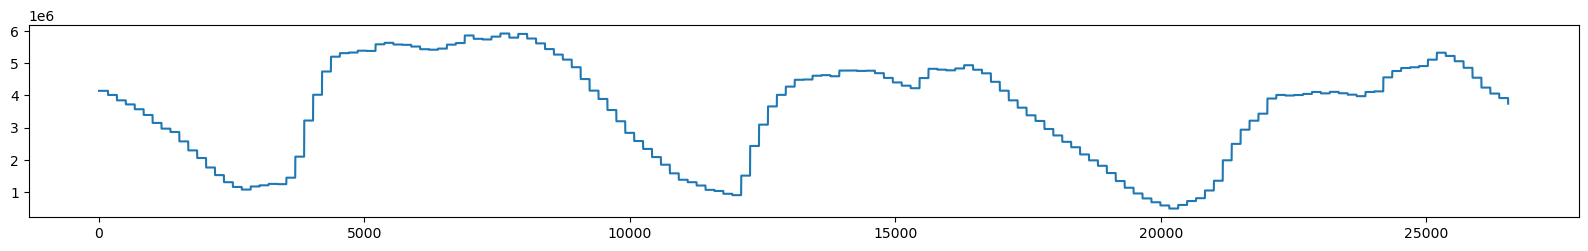

In [132]:
water_reservoir['Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO1'].plot(figsize = (20, 2.5))

### Aggregating all sub-datasets
Now that we have aggregated each of the sub-datasets, we can merge them together into a larger dataset that can be used to train time series electricity price prediction models on. we will wait with adding the water_reservoir until the time-range column 'MTU (UTC)' of the other datasets have been converted to datetime columns.

In [117]:
# merging prices, loads, actual_generation_selected and
# import_export_no1_neighbours dataframes on the date time
# column 'MTU (UTC)'

# creating a list of dataframes (excluding water water_reservoir)
no1_dataframes_minus_water_reservoir = [
    prices,
    load,
    actual_generation_selected,
    import_export_no1_neighbours_2020_2022,
    ]

# merging dataframes
no1_minus_water_reservoir = reduce(lambda left, right: pd.merge(
    left,right, on=['MTU (UTC)']), no1_dataframes_minus_water_reservoir)

# printing out shape of the resulting dataframe
no1_minus_water_reservoir.shape

(26304, 52)

we can see that the resulting dataframe has the correct number of rows (26304) and 51 columns.

We print out the start and end of the dataset to see that it has the correct end values for MTU(UTC)

In [118]:
# printing the 5 first rows of resulting dataframe
no1_minus_water_reservoir.head()

,MTU (UTC),Day-ahead Price [EUR/MWh] BZN|NO1,Day-ahead Price [EUR/MWh] BZN|NO2,Day-ahead Price [EUR/MWh] BZN|NO3,Day-ahead Price [EUR/MWh] BZN|NO5,Day-ahead Price [EUR/MWh] BZN|SE3,Actual Total Load [MW] - BZN|NO1,Actual Total Load [MW] - BZN|NO2,Actual Total Load [MW] - BZN|NO3,Actual Total Load [MW] - BZN|NO5,...,Solar - BZN|SE3,Wind Onshore - BZN|SE3,CBF BZN|NO2 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|NO2 [MW],CBF BZN|NO3 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|NO3 [MW],CBF BZN|NO5 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|NO5 [MW],CBF BZN|SE3 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|SE3 [MW]
0,01.01.2020 00:00 - 01.01.2020 01:00,31.77,31.77,28.45,31.77,28.45,4333.0,4139.0,3016.0,1950.0,...,0.0,1594.0,0.0,0.0,82.0,0.0,1449.0,0.0,391,0
1,01.01.2020 01:00 - 01.01.2020 02:00,31.57,31.57,27.90,31.57,27.90,4250.0,4114.0,2945.0,1926.0,...,0.0,1690.0,0.0,0.0,48.0,0.0,1283.0,0.0,348,0
2,01.01.2020 02:00 - 01.01.2020 03:00,31.28,31.28,27.52,31.28,27.52,4167.0,4030.0,3032.0,1913.0,...,0.0,1783.0,0.0,0.0,0.0,6.0,962.0,0.0,500,0
3,01.01.2020 03:00 - 01.01.2020 04:00,30.72,30.72,27.54,30.72,27.54,4145.0,4032.0,2988.0,1894.0,...,0.0,1900.0,0.0,0.0,0.0,6.0,767.0,0.0,610,0
4,01.01.2020 04:00 - 01.01.2020 05:00,30.27,30.27,26.55,30.27,26.55,4222.0,4032.0,2848.0,1901.0,...,0.0,1995.0,0.0,0.0,0.0,22.0,642.0,0.0,909,0


In [119]:
# printing the 5 last rows of resulting dataframe
no1_minus_water_reservoir.tail()

,MTU (UTC),Day-ahead Price [EUR/MWh] BZN|NO1,Day-ahead Price [EUR/MWh] BZN|NO2,Day-ahead Price [EUR/MWh] BZN|NO3,Day-ahead Price [EUR/MWh] BZN|NO5,Day-ahead Price [EUR/MWh] BZN|SE3,Actual Total Load [MW] - BZN|NO1,Actual Total Load [MW] - BZN|NO2,Actual Total Load [MW] - BZN|NO3,Actual Total Load [MW] - BZN|NO5,...,Solar - BZN|SE3,Wind Onshore - BZN|SE3,CBF BZN|NO2 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|NO2 [MW],CBF BZN|NO3 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|NO3 [MW],CBF BZN|NO5 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|NO5 [MW],CBF BZN|SE3 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|SE3 [MW]
26299,31.12.2022 19:00 - 31.12.2022 20:00,123.61,123.61,23.82,123.61,11.57,4650.0,4333.0,3612.0,2128.0,...,0.0,1499.0,621.0,0.0,146.0,0.0,43.0,0.0,2083,0
26300,31.12.2022 20:00 - 31.12.2022 21:00,121.09,121.09,23.93,121.09,14.89,4573.0,4270.0,3605.0,2089.0,...,0.0,1282.0,595.0,0.0,124.0,0.0,24.0,0.0,2097,0
26301,31.12.2022 21:00 - 31.12.2022 22:00,120.00,120.00,23.75,120.00,9.94,4453.0,4294.0,3479.0,2037.0,...,0.0,1168.0,608.0,0.0,91.0,0.0,41.0,0.0,2007,0
26302,31.12.2022 22:00 - 31.12.2022 23:00,119.98,119.98,23.56,119.98,4.84,4389.0,4282.0,3415.0,1991.0,...,0.0,1033.0,504.0,0.0,90.0,0.0,0.0,29.0,2119,0
26303,31.12.2022 23:00 - 01.01.2023 00:00,119.32,119.32,23.35,119.32,2.01,4444.0,4182.0,3346.0,2009.0,...,0.0,877.0,956.0,0.0,83.0,0.0,0.0,12.0,1612,0


We see that the dataframe starts in the beginning of 2020 and ends at the end of 2022 so the data has been merged successfuly.

We can now convert the datetime range into specific datetimes so the data can be used in timeseries data prediction, and so that the 'water_reservoir' dataset can be added to the final dataset.

In [120]:
# splitting the time column 'MTU (UTC)' data on the '-' symbol
no1_minus_water_reservoir[['start MTU (UTC)', 'end MTU (UTC)']] = no1_minus_water_reservoir['MTU (UTC)'].str.split('-', 1, expand=True)
no1_minus_water_reservoir.head()
# dropping the 'MTU (CET/CEST)' column
no1_minus_water_reservoir = no1_minus_water_reservoir.drop(['MTU (UTC)'], axis=1)

# converting the start and end columns to datetime
no1_minus_water_reservoir['start MTU (UTC)'] = pd.to_datetime(no1_minus_water_reservoir['start MTU (UTC)'], format = "%d.%m.%Y %H:%M", exact=False)
no1_minus_water_reservoir['end MTU (UTC)'] = pd.to_datetime(no1_minus_water_reservoir['end MTU (UTC)'],format = "%d.%m.%Y %H:%M", exact=False)


# printing out 5 first rows of the resulting dataframe
no1_minus_water_reservoir.head()

,Day-ahead Price [EUR/MWh] BZN|NO1,Day-ahead Price [EUR/MWh] BZN|NO2,Day-ahead Price [EUR/MWh] BZN|NO3,Day-ahead Price [EUR/MWh] BZN|NO5,Day-ahead Price [EUR/MWh] BZN|SE3,Actual Total Load [MW] - BZN|NO1,Actual Total Load [MW] - BZN|NO2,Actual Total Load [MW] - BZN|NO3,Actual Total Load [MW] - BZN|NO5,Actual Total Load [MW] - BZN|SE3,...,CBF BZN|NO2 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|NO2 [MW],CBF BZN|NO3 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|NO3 [MW],CBF BZN|NO5 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|NO5 [MW],CBF BZN|SE3 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|SE3 [MW],start MTU (UTC),end MTU (UTC)
0,31.77,31.77,28.45,31.77,28.45,4333.0,4139.0,3016.0,1950.0,9350,...,0.0,0.0,82.0,0.0,1449.0,0.0,391,0,2020-01-01 00:00:00,2020-01-01 01:00:00
1,31.57,31.57,27.90,31.57,27.90,4250.0,4114.0,2945.0,1926.0,9158,...,0.0,0.0,48.0,0.0,1283.0,0.0,348,0,2020-01-01 01:00:00,2020-01-01 02:00:00
2,31.28,31.28,27.52,31.28,27.52,4167.0,4030.0,3032.0,1913.0,8980,...,0.0,0.0,0.0,6.0,962.0,0.0,500,0,2020-01-01 02:00:00,2020-01-01 03:00:00
3,30.72,30.72,27.54,30.72,27.54,4145.0,4032.0,2988.0,1894.0,8914,...,0.0,0.0,0.0,6.0,767.0,0.0,610,0,2020-01-01 03:00:00,2020-01-01 04:00:00
4,30.27,30.27,26.55,30.27,26.55,4222.0,4032.0,2848.0,1901.0,8964,...,0.0,0.0,0.0,22.0,642.0,0.0,909,0,2020-01-01 04:00:00,2020-01-01 05:00:00


Checking datatype of the time columns in the resulting dataframe.


In [121]:
# printing info about columns:
no1_minus_water_reservoir.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26304 entries, 0 to 26303
Data columns (total 53 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Day-ahead Price [EUR/MWh] BZN|NO1          26304 non-null  float64       
 1   Day-ahead Price [EUR/MWh] BZN|NO2          26304 non-null  float64       
 2   Day-ahead Price [EUR/MWh] BZN|NO3          26304 non-null  float64       
 3   Day-ahead Price [EUR/MWh] BZN|NO5          26304 non-null  float64       
 4   Day-ahead Price [EUR/MWh] BZN|SE3          26304 non-null  float64       
 5   Actual Total Load [MW] - BZN|NO1           26303 non-null  float64       
 6   Actual Total Load [MW] - BZN|NO2           26303 non-null  float64       
 7   Actual Total Load [MW] - BZN|NO3           26303 non-null  float64       
 8   Actual Total Load [MW] - BZN|NO5           26303 non-null  float64       
 9   Actual Total Load

We can now add the "water_reservoir" dataframe to the other data

In [122]:
# merging dataframes no1_minus_water_reservoir and water_reservoir
no1 = reduce(lambda left, right: pd.merge(
    left,right, on=['start MTU (UTC)']), [no1_minus_water_reservoir, water_reservoir])

# printing out shape of the resulting dataframe
no1.shape

(26304, 58)

We can see that the resulting dataframe has the correct number of rows (26304) and 57 columns.

We now want to check if there are any new missing values resulting from the merging.

In [123]:
no1.isna().sum()

Day-ahead Price [EUR/MWh] BZN|NO1                                                 0
Day-ahead Price [EUR/MWh] BZN|NO2                                                 0
Day-ahead Price [EUR/MWh] BZN|NO3                                                 0
Day-ahead Price [EUR/MWh] BZN|NO5                                                 0
Day-ahead Price [EUR/MWh] BZN|SE3                                                 0
Actual Total Load [MW] - BZN|NO1                                                  1
Actual Total Load [MW] - BZN|NO2                                                  1
Actual Total Load [MW] - BZN|NO3                                                  1
Actual Total Load [MW] - BZN|NO5                                                  1
Actual Total Load [MW] - BZN|SE3                                                  0
Fossil Gas - BZN|NO1                                                              5
Hydro Run-of-river and poundage - BZN|NO1                                   

We see that the same missing values occur, with no new missing values.

We print out the start and end of the dataset to see that it has the correct end values for MTU(UTC).

In [124]:
# printing out 5 first rows of the resulting dataframe
no1.head()

,Day-ahead Price [EUR/MWh] BZN|NO1,Day-ahead Price [EUR/MWh] BZN|NO2,Day-ahead Price [EUR/MWh] BZN|NO3,Day-ahead Price [EUR/MWh] BZN|NO5,Day-ahead Price [EUR/MWh] BZN|SE3,Actual Total Load [MW] - BZN|NO1,Actual Total Load [MW] - BZN|NO2,Actual Total Load [MW] - BZN|NO3,Actual Total Load [MW] - BZN|NO5,Actual Total Load [MW] - BZN|SE3,...,CBF BZN|NO1 > BZN|NO5 [MW],CBF BZN|SE3 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|SE3 [MW],start MTU (UTC),end MTU (UTC),Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO1,Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO2,Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO3,Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO5,Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|SE3
0,31.77,31.77,28.45,31.77,28.45,4333.0,4139.0,3016.0,1950.0,9350,...,0.0,391,0,2020-01-01 00:00:00,2020-01-01 01:00:00,4012000.0,24273000.0,5588000.0,11211000.0,2220000.0
1,31.57,31.57,27.90,31.57,27.90,4250.0,4114.0,2945.0,1926.0,9158,...,0.0,348,0,2020-01-01 01:00:00,2020-01-01 02:00:00,4012000.0,24273000.0,5588000.0,11211000.0,2220000.0
2,31.28,31.28,27.52,31.28,27.52,4167.0,4030.0,3032.0,1913.0,8980,...,0.0,500,0,2020-01-01 02:00:00,2020-01-01 03:00:00,4012000.0,24273000.0,5588000.0,11211000.0,2220000.0
3,30.72,30.72,27.54,30.72,27.54,4145.0,4032.0,2988.0,1894.0,8914,...,0.0,610,0,2020-01-01 03:00:00,2020-01-01 04:00:00,4012000.0,24273000.0,5588000.0,11211000.0,2220000.0
4,30.27,30.27,26.55,30.27,26.55,4222.0,4032.0,2848.0,1901.0,8964,...,0.0,909,0,2020-01-01 04:00:00,2020-01-01 05:00:00,4012000.0,24273000.0,5588000.0,11211000.0,2220000.0


In [125]:
# printing the last 5 rows of the resulting dataframe
no1.tail()

,Day-ahead Price [EUR/MWh] BZN|NO1,Day-ahead Price [EUR/MWh] BZN|NO2,Day-ahead Price [EUR/MWh] BZN|NO3,Day-ahead Price [EUR/MWh] BZN|NO5,Day-ahead Price [EUR/MWh] BZN|SE3,Actual Total Load [MW] - BZN|NO1,Actual Total Load [MW] - BZN|NO2,Actual Total Load [MW] - BZN|NO3,Actual Total Load [MW] - BZN|NO5,Actual Total Load [MW] - BZN|SE3,...,CBF BZN|NO1 > BZN|NO5 [MW],CBF BZN|SE3 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|SE3 [MW],start MTU (UTC),end MTU (UTC),Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO1,Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO2,Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO3,Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO5,Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|SE3
26299,123.61,123.61,23.82,123.61,11.57,4650.0,4333.0,3612.0,2128.0,9602,...,0.0,2083,0,2022-12-31 19:00:00,2022-12-31 20:00:00,3915448.0,21384042.0,5038234.0,12014136.0,1579000.0
26300,121.09,121.09,23.93,121.09,14.89,4573.0,4270.0,3605.0,2089.0,9251,...,0.0,2097,0,2022-12-31 20:00:00,2022-12-31 21:00:00,3915448.0,21384042.0,5038234.0,12014136.0,1579000.0
26301,120.00,120.00,23.75,120.00,9.94,4453.0,4294.0,3479.0,2037.0,9092,...,0.0,2007,0,2022-12-31 21:00:00,2022-12-31 22:00:00,3915448.0,21384042.0,5038234.0,12014136.0,1579000.0
26302,119.98,119.98,23.56,119.98,4.84,4389.0,4282.0,3415.0,1991.0,8944,...,29.0,2119,0,2022-12-31 22:00:00,2022-12-31 23:00:00,3915448.0,21384042.0,5038234.0,12014136.0,1579000.0
26303,119.32,119.32,23.35,119.32,2.01,4444.0,4182.0,3346.0,2009.0,8955,...,12.0,1612,0,2022-12-31 23:00:00,2023-01-01 00:00:00,3915448.0,21384042.0,5038234.0,12014136.0,1579000.0


We can see that the columns for start datetime and end datetime of the dataset is correct. One thing of note is that the time columns are almost at the end of the dataset. Since we are dealing with time series data, it would be useful to have the datetime columns at the beginning of the dataframe. We will therefore move the start and end datetime columns to the start of the dataframe.

In [126]:
# creating a list of column names
no1_columns = no1.columns.tolist()
# removing names of datetime column names from columnslist
no1_columns.remove('start MTU (UTC)')
no1_columns.remove('end MTU (UTC)')

# inserting the datetime column names to start of list 
no1_columns.insert(0, 'end MTU (UTC)')
no1_columns.insert(0, 'start MTU (UTC)')

# printing out resulting list
print(no1_columns)

['start MTU (UTC)', 'end MTU (UTC)', 'Day-ahead Price [EUR/MWh] BZN|NO1', 'Day-ahead Price [EUR/MWh] BZN|NO2', 'Day-ahead Price [EUR/MWh] BZN|NO3', 'Day-ahead Price [EUR/MWh] BZN|NO5', 'Day-ahead Price [EUR/MWh] BZN|SE3', 'Actual Total Load [MW] - BZN|NO1', 'Actual Total Load [MW] - BZN|NO2', 'Actual Total Load [MW] - BZN|NO3', 'Actual Total Load [MW] - BZN|NO5', 'Actual Total Load [MW] - BZN|SE3', 'Fossil Gas - BZN|NO1', 'Hydro Run-of-river and poundage - BZN|NO1', 'Hydro Water Reservoir - BZN|NO1', 'Other - BZN|NO1', 'Waste - BZN|NO1', 'Wind Onshore - BZN|NO1', 'Fossil Gas - BZN|NO2', 'Hydro Pumped Storage Aggregated- BZN|NO2', 'Hydro Run-of-river and poundage - BZN|NO2', 'Hydro Water Reservoir - BZN|NO2', 'Other - BZN|NO2', 'Waste - BZN|NO2', 'Wind Onshore - BZN|NO2', 'Fossil Gas - BZN|NO3', 'Hydro Pumped Storage Aggregated- BZN|NO3', 'Hydro Run-of-river and poundage - BZN|NO3', 'Hydro Water Reservoir - BZN|NO3', 'Other - BZN|NO3', 'Other renewable - BZN|NO3', 'Waste - BZN|NO3', 'Wi

We now have a list with the time columns at the beginning, and can reorder the columns so the datetime columns are at the begining of the dataframe

In [127]:
# reordering the columns so start time and end time is first
no1 = no1.reindex(columns=no1_columns)

# printing out 5 first rows of dataframe to check if the order has been updated correctly
no1.head()

,start MTU (UTC),end MTU (UTC),Day-ahead Price [EUR/MWh] BZN|NO1,Day-ahead Price [EUR/MWh] BZN|NO2,Day-ahead Price [EUR/MWh] BZN|NO3,Day-ahead Price [EUR/MWh] BZN|NO5,Day-ahead Price [EUR/MWh] BZN|SE3,Actual Total Load [MW] - BZN|NO1,Actual Total Load [MW] - BZN|NO2,Actual Total Load [MW] - BZN|NO3,...,CBF BZN|NO1 > BZN|NO3 [MW],CBF BZN|NO5 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|NO5 [MW],CBF BZN|SE3 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|SE3 [MW],Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO1,Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO2,Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO3,Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO5,Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|SE3
0,2020-01-01 00:00:00,2020-01-01 01:00:00,31.77,31.77,28.45,31.77,28.45,4333.0,4139.0,3016.0,...,0.0,1449.0,0.0,391,0,4012000.0,24273000.0,5588000.0,11211000.0,2220000.0
1,2020-01-01 01:00:00,2020-01-01 02:00:00,31.57,31.57,27.90,31.57,27.90,4250.0,4114.0,2945.0,...,0.0,1283.0,0.0,348,0,4012000.0,24273000.0,5588000.0,11211000.0,2220000.0
2,2020-01-01 02:00:00,2020-01-01 03:00:00,31.28,31.28,27.52,31.28,27.52,4167.0,4030.0,3032.0,...,6.0,962.0,0.0,500,0,4012000.0,24273000.0,5588000.0,11211000.0,2220000.0
3,2020-01-01 03:00:00,2020-01-01 04:00:00,30.72,30.72,27.54,30.72,27.54,4145.0,4032.0,2988.0,...,6.0,767.0,0.0,610,0,4012000.0,24273000.0,5588000.0,11211000.0,2220000.0
4,2020-01-01 04:00:00,2020-01-01 05:00:00,30.27,30.27,26.55,30.27,26.55,4222.0,4032.0,2848.0,...,22.0,642.0,0.0,909,0,4012000.0,24273000.0,5588000.0,11211000.0,2220000.0


In [128]:
print(no1.columns)

Index(['start MTU (UTC)', 'end MTU (UTC)', 'Day-ahead Price [EUR/MWh] BZN|NO1',
       'Day-ahead Price [EUR/MWh] BZN|NO2',
       'Day-ahead Price [EUR/MWh] BZN|NO3',
       'Day-ahead Price [EUR/MWh] BZN|NO5',
       'Day-ahead Price [EUR/MWh] BZN|SE3', 'Actual Total Load [MW] - BZN|NO1',
       'Actual Total Load [MW] - BZN|NO2', 'Actual Total Load [MW] - BZN|NO3',
       'Actual Total Load [MW] - BZN|NO5', 'Actual Total Load [MW] - BZN|SE3',
       'Fossil Gas - BZN|NO1', 'Hydro Run-of-river and poundage - BZN|NO1',
       'Hydro Water Reservoir - BZN|NO1', 'Other - BZN|NO1', 'Waste - BZN|NO1',
       'Wind Onshore - BZN|NO1', 'Fossil Gas - BZN|NO2',
       'Hydro Pumped Storage Aggregated- BZN|NO2',
       'Hydro Run-of-river and poundage - BZN|NO2',
       'Hydro Water Reservoir - BZN|NO2', 'Other - BZN|NO2', 'Waste - BZN|NO2',
       'Wind Onshore - BZN|NO2', 'Fossil Gas - BZN|NO3',
       'Hydro Pumped Storage Aggregated- BZN|NO3',
       'Hydro Run-of-river and poundage - BZN|

We can see that the datetime columns are at the start of the dataframe and that we still have 57 columns, so the reordering was successful.

We will now print out the final order of the features for reference.

In [129]:
# printing out the final order of the features
no1.columns

Index(['start MTU (UTC)', 'end MTU (UTC)', 'Day-ahead Price [EUR/MWh] BZN|NO1',
       'Day-ahead Price [EUR/MWh] BZN|NO2',
       'Day-ahead Price [EUR/MWh] BZN|NO3',
       'Day-ahead Price [EUR/MWh] BZN|NO5',
       'Day-ahead Price [EUR/MWh] BZN|SE3', 'Actual Total Load [MW] - BZN|NO1',
       'Actual Total Load [MW] - BZN|NO2', 'Actual Total Load [MW] - BZN|NO3',
       'Actual Total Load [MW] - BZN|NO5', 'Actual Total Load [MW] - BZN|SE3',
       'Fossil Gas - BZN|NO1', 'Hydro Run-of-river and poundage - BZN|NO1',
       'Hydro Water Reservoir - BZN|NO1', 'Other - BZN|NO1', 'Waste - BZN|NO1',
       'Wind Onshore - BZN|NO1', 'Fossil Gas - BZN|NO2',
       'Hydro Pumped Storage Aggregated- BZN|NO2',
       'Hydro Run-of-river and poundage - BZN|NO2',
       'Hydro Water Reservoir - BZN|NO2', 'Other - BZN|NO2', 'Waste - BZN|NO2',
       'Wind Onshore - BZN|NO2', 'Fossil Gas - BZN|NO3',
       'Hydro Pumped Storage Aggregated- BZN|NO3',
       'Hydro Run-of-river and poundage - BZN|

#### summary:
The Final dataset for zone NO1 and the neighbouring zones has 26304 rows and 57 columns (two of which is datetime for start and end of time period).

#### Export to csv
Code to export dataframe to csv:

In [130]:
# uncomment to export no1 dataframe to csv
# no1.to_csv('../datasets/no1_aggregated/no1_2020_to_2022_aggregated.csv', index=False)

<AxesSubplot:>

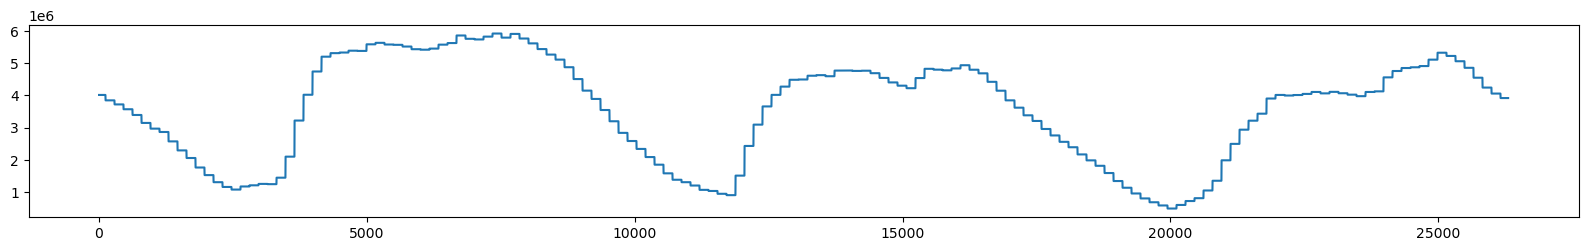

In [133]:
no1['Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO1'].plot(figsize = (20, 2.5))